# Exploration of the relationship between house prices and related attributes in Camden, City of Bristol and Birmingham.

## We read the original transaction data and select required columns, time periods. The cleaned transaction data is obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from geopandas import GeoDataFrame
import geopandas as gpd
from scipy.stats import norm
import scipy.stats as stats
import os

# df0 = pd.read_csv(os.path.join('code','tranall2011_19.csv'))
# df0.head()





In [2]:
# df0.columns[0:51]

In [3]:
# col_to_keep = ['price','priceper','oldnew','propertytype','tfarea','numberrooms','lad11nm', 'rgn11nm','lsoa11','msoa11','dateoftransfer']

In [4]:
# df0_clean = df0[col_to_keep]

In [5]:
# df0_clean["lad11nm"].unique()

In [6]:
# df0_clean['dateoftransfer'] = pd.to_datetime(df0_clean['dateoftransfer'])  

In [7]:
# df0_clean[df0_clean["lad11nm"] == "Camden"].dtypes

In [8]:
# mask = (df0_clean['dateoftransfer'] > '2019-01-01') & (df0_clean['dateoftransfer'] <= '2019-12-31')
# df0_clean = df0_clean.loc[mask]

In [9]:
# df0_clean["rgn11nm"].unique()

In [10]:
# df0_bristol = df0_clean[df0_clean["lad11nm"] == "Bristol, City of"]

In [11]:
# df0_bristol

In [12]:
# df0_bristol.to_excel(os.path.join('code','bristol_transaction.xlsx'),index = False)

In [13]:
# df0_camden = df0_clean[df0_clean["lad11nm"] == "Camden"]

In [14]:
# df0_camden

In [15]:
# df0_camden.to_excel(os.path.join('code','camden_transaction.xlsx'),index = False)

In [16]:
# df0_Birmingham = df0_clean[df0_clean["lad11nm"] == "Birmingham"]

In [17]:
# df0_Birmingham

In [18]:
# df0_Birmingham.to_excel(os.path.join('code','birmingham_transaction.xlsx'),index = False)

In [19]:
# df0_bristol['lsoa11'].nunique()

In [20]:
# df0_camden['lsoa11'].nunique()

In [21]:
# df0_Birmingham['lsoa11'].nunique()

In [22]:
#next: combine two types of dataset 

## The transaction and demographics data have been read and separated at this stage. Also, we combined the transaction data and the demographics data into a single dataset.

In [23]:
#read bristol transaction data
pd.set_option('display.max_rows', 300)
pd.options.display.float_format = '{:40,.4f}'.format 
plt.style.use('ggplot')
%matplotlib inline
df0_bristol_transaction = pd.read_excel(os.path.join('code','bristol_transaction.xlsx'))
df0_bristol_transaction.head()

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


,price,priceper,oldnew,propertytype,tfarea,numberrooms,lad11nm,rgn11nm,lsoa11,msoa11,dateoftransfer
0,132500,"2,880.4348",N,F,46.0000,2,"Bristol, City of",South West,E01014707,E02003060,2019-09-20
1,803000,"4,779.7619",N,T,168.0000,10,"Bristol, City of",South West,E01014616,E02003017,2019-07-12
2,215000,"2,654.3210",N,T,81.0000,5,"Bristol, City of",South West,E01032515,E02003064,2019-01-24
3,174000,"3,163.6364",N,F,55.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-02-14
4,352000,"3,485.1485",N,T,101.0000,4,"Bristol, City of",South West,E01033364,E02003050,2019-02-28


In [24]:
df0_bristol_transaction = df0_bristol_transaction.rename({'price':'total_price', 
                                'priceper':'unit_price', 
                                'oldnew': 'old_new',
                                'propertytype':'property_type', 
                                'tfarea':'floor_area',
                                'numberrooms':'room_number',
                                'lad11nm':'local_authority', 
                                'rgn11nm':'region',
                                'lsoa11':'lsoa_code',
                                'msoa11': 'msoa_code',
                                'dateoftransfer':'date'}, axis='columns')

In [25]:
df0_bristol_transaction.property_type.unique()

array(['F', 'T', 'S', 'D'], dtype=object)

In [26]:
df0_bristol_transaction

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date
0,132500,"2,880.4348",N,F,46.0000,2,"Bristol, City of",South West,E01014707,E02003060,2019-09-20
1,803000,"4,779.7619",N,T,168.0000,10,"Bristol, City of",South West,E01014616,E02003017,2019-07-12
2,215000,"2,654.3210",N,T,81.0000,5,"Bristol, City of",South West,E01032515,E02003064,2019-01-24
3,174000,"3,163.6364",N,F,55.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-02-14
4,352000,"3,485.1485",N,T,101.0000,4,"Bristol, City of",South West,E01033364,E02003050,2019-02-28
...,...,...,...,...,...,...,...,...,...,...,...
3728,250000,"2,380.9524",N,T,105.0000,7,"Bristol, City of",South West,E01014627,E02003032,2019-08-02
3729,410000,"3,628.3186",N,S,113.0000,6,"Bristol, City of",South West,E01014641,E02003018,2019-07-01
3730,225000,"1,975.7640",N,T,113.8800,7,"Bristol, City of",South West,E01014640,E02003014,2019-06-21
3731,535000,"3,715.2778",N,T,144.0000,6,"Bristol, City of",South West,E01014551,E02003037,2019-01-18


In [27]:
len(df0_bristol_transaction.lsoa_code.unique())

263

In [28]:
#read bristol demographics data
df0_bristol_demg = pd.read_excel(os.path.join('code','demographics_bristol.xlsx'))
df0_bristol_demg.head()


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


,Codes,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,E01014485,Bristol 023A,66.1449,86,225,105,1807,127
1,E01014486,Bristol 023B,83.8885,153,264,231,2297,376
2,E01014487,Bristol 020A,103.3592,19,181,53,1995,38
3,E01014488,Bristol 023C,105.9543,62,259,124,1971,173
4,E01014489,Bristol 023D,139.8719,94,230,151,2390,338


In [29]:
#rename demg dataframe
df0_bristol_demg = df0_bristol_demg.rename({'Codes':'lsoa_code'},axis = 'columns')

In [30]:
df0_bristol_demg

,lsoa_code,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,E01014485,Bristol 023A,66.1449,86,225,105,1807,127
1,E01014486,Bristol 023B,83.8885,153,264,231,2297,376
2,E01014487,Bristol 020A,103.3592,19,181,53,1995,38
3,E01014488,Bristol 023C,105.9543,62,259,124,1971,173
4,E01014489,Bristol 023D,139.8719,94,230,151,2390,338
5,E01014491,Bristol 020B,61.5433,41,218,68,1917,26
6,E01014492,Bristol 008A,31.7849,63,158,197,1478,299
7,E01014493,Bristol 008B,55.6470,52,181,206,1482,164
8,E01014494,Bristol 008C,23.7696,26,188,135,1472,41
9,E01014495,Bristol 008D,45.8967,47,220,158,1638,138


In [31]:
#merge trans and demg data 
bristol_merge = pd.merge(df0_bristol_transaction, df0_bristol_demg, on='lsoa_code', how='left')

In [32]:
bristol_merge.to_excel(r'/Users/richshen/Desktop/dissertation/final_project/code/bristol_merge.xlsx',index = False)

In [33]:
bristol_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,132500,"2,880.4348",N,F,46.0000,2,"Bristol, City of",South West,E01014707,E02003060,2019-09-20,Bristol 049F,45.7184,35,207,164,1591,45
1,803000,"4,779.7619",N,T,168.0000,10,"Bristol, City of",South West,E01014616,E02003017,2019-07-12,Bristol 006A,40.1213,9,137,36,1475,52
2,215000,"2,654.3210",N,T,81.0000,5,"Bristol, City of",South West,E01032515,E02003064,2019-01-24,Bristol 053F,12.9105,72,152,246,1371,201
3,174000,"3,163.6364",N,F,55.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-02-14,Bristol 033A,29.2063,24,178,107,1413,29
4,352000,"3,485.1485",N,T,101.0000,4,"Bristol, City of",South West,E01033364,E02003050,2019-02-28,Bristol 039H,101.8313,30,143,92,1557,103


In [34]:
############

In [35]:
#read camden transaction data 
df0_camden_transaction = pd.read_excel(os.path.join('code','camden_transaction.xlsx'))
df0_camden_transaction.head()



/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


,price,priceper,oldnew,propertytype,tfarea,numberrooms,lad11nm,rgn11nm,lsoa11,msoa11,dateoftransfer
0,415000,"8,321.6363",N,F,49.8700,2,Camden,London,E01000974,E02000178,2019-09-04
1,1172500,"9,770.8333",N,T,120.0000,4,Camden,London,E01000900,E02000177,2019-09-20
2,2205000,"17,093.0233",N,D,129.0000,4,Camden,London,E01000913,E02000166,2019-07-09
3,3300000,"13,043.4783",N,T,253.0000,8,Camden,London,E01000849,E02000176,2019-02-14
4,769595,"8,275.2151",N,F,93.0000,4,Camden,London,E01000904,E02000177,2019-01-31


In [36]:
df0_camden_transaction = df0_camden_transaction.rename({'price':'total_price', 
                                'priceper':'unit_price', 
                                'oldnew': 'old_new',
                                'propertytype':'property_type', 
                                'tfarea':'floor_area',
                                'numberrooms':'room_number',
                                'lad11nm':'local_authority', 
                                'rgn11nm':'region',
                                'lsoa11':'lsoa_code',
                                'msoa11': 'msoa_code',
                                'dateoftransfer':'date'}, axis='columns')

In [37]:
df0_camden_transaction

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date
0,415000,"8,321.6363",N,F,49.8700,2,Camden,London,E01000974,E02000178,2019-09-04
1,1172500,"9,770.8333",N,T,120.0000,4,Camden,London,E01000900,E02000177,2019-09-20
2,2205000,"17,093.0233",N,D,129.0000,4,Camden,London,E01000913,E02000166,2019-07-09
3,3300000,"13,043.4783",N,T,253.0000,8,Camden,London,E01000849,E02000176,2019-02-14
4,769595,"8,275.2151",N,F,93.0000,4,Camden,London,E01000904,E02000177,2019-01-31
...,...,...,...,...,...,...,...,...,...,...,...
756,1600000,"9,876.5432",N,T,162.0000,6,Camden,London,E01000847,E02000179,2019-07-19
757,2100000,"8,677.6860",N,T,242.0000,8,Camden,London,E01000923,E02000168,2019-04-08
758,6993140,"20,199.7111",N,D,346.2000,13,Camden,London,E01000893,E02000167,2019-07-31
759,10000000,"40,000.0000",N,T,250.0000,8,Camden,London,E01000946,E02000186,2019-05-23


In [38]:
# import random

# mean_923_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000923']['total_price'])
# mean_924_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000924']['total_price'])
# mean_926_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000926']['total_price'])
# mean_for_925_total_price = (mean_923_total_price + mean_924_total_price + mean_926_total_price)/3
# print(mean_for_925_total_price) #1015285.7142857142

# mean_923_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000923']['unit_price'])
# mean_924_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000924']['unit_price'])
# mean_926_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000926']['unit_price'])
# mean_for_925_unit_price = (mean_923_unit_price + mean_924_unit_price + mean_926_unit_price)/3
# print(mean_for_925_unit_price)

# mean_923_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000923']['floor_area'])
# mean_924_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000924']['floor_area'])
# mean_926_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000926']['floor_area'])
# mean_for_925_floor_area = (mean_923_floor_area + mean_924_floor_area + mean_926_floor_area)/3
# print(mean_for_925_floor_area)

# mean_923_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000923']['room_number'])
# mean_924_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000924']['room_number'])
# mean_926_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000926']['room_number'])
# mean_for_925_room_number = (mean_923_room_number + mean_924_room_number + mean_926_room_number)/3
# print(mean_for_925_room_number)

# new_row = {'total_price':1015285.7142857142, 'unit_price':9124.9270218175, 'old_new':'N', 'msoa_code':'E02000174',
#           'property_type':random.choice(['D','T','F','S']),'floor_area':113.27952380952381,'room_number':4.535714285714286,
#           'local_authority':'Camden','region':'London','lsoa_code':'E01000925','date': random.choice(pd.date_range('2019-01-01', '2019-12-31', freq='D'))}

# #append row to the dataframe
# df0_camden_transaction = df0_camden_transaction.append(new_row, ignore_index=True)



In [39]:
# mean_920_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000920']['total_price'])
# mean_937_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000937']['total_price'])
# mean_940_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000940']['total_price'])
# mean_for_936_total_price = (mean_920_total_price + mean_937_total_price + mean_940_total_price)/3
# print(mean_for_936_total_price) 

# mean_920_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000920']['unit_price'])
# mean_937_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000937']['unit_price'])
# mean_940_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000940']['unit_price'])
# mean_for_936_unit_price = (mean_920_unit_price + mean_937_unit_price + mean_940_unit_price)/3
# print(mean_for_936_unit_price)

# mean_920_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000920']['floor_area'])
# mean_937_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000937']['floor_area'])
# mean_940_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000940']['floor_area'])
# mean_for_936_floor_area = (mean_920_floor_area + mean_937_floor_area + mean_940_floor_area)/3
# print(mean_for_936_floor_area)

# mean_920_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000920']['room_number'])
# mean_937_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000937']['room_number'])
# mean_940_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000940']['room_number'])
# mean_for_936_room_number = (mean_920_room_number + mean_937_room_number + mean_940_room_number)/3
# print(mean_for_936_room_number)

# new_row1 = {'total_price':564916.6666666666, 'unit_price':11615.026057908828, 'old_new':'N',  'msoa_code':'E02000189',
#           'property_type':random.choice(['D','T','F','S']),'floor_area':49.95666666666667,'room_number':2.3333333333333335,
#           'local_authority':'Camden','region':'London','lsoa_code':'E01000936','date': random.choice(pd.date_range('2019-01-01', '2019-12-31', freq='D'))}

# #append row to the dataframe
# df0_camden_transaction = df0_camden_transaction.append(new_row1, ignore_index=True)

In [40]:
# mean_942_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000942']['total_price'])
# mean_943_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000943']['total_price'])
# mean_937_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000937']['total_price'])
# mean_for_941_total_price = (mean_942_total_price + mean_943_total_price + mean_937_total_price)/3
# print(mean_for_941_total_price) 

# mean_942_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000942']['unit_price'])
# mean_943_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000943']['unit_price'])
# mean_937_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000937']['unit_price'])
# mean_for_941_unit_price = (mean_942_unit_price + mean_943_unit_price + mean_937_unit_price)/3
# print(mean_for_941_unit_price) 

# mean_942_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000942']['floor_area'])
# mean_943_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000943']['floor_area'])
# mean_937_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000937']['floor_area'])
# mean_for_941_floor_area = (mean_942_floor_area + mean_943_floor_area + mean_937_floor_area)/3
# print(mean_for_941_floor_area) 

# mean_942_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000942']['room_number'])
# mean_943_room_number= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000943']['room_number'])
# mean_937_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000937']['room_number'])
# mean_for_941_room_number = (mean_942_room_number + mean_943_room_number + mean_937_room_number)/3
# print(mean_for_941_room_number) 



# new_row2 = {'total_price':510388.8888888888, 'unit_price':11369.830059694244, 'old_new':'N',  'msoa_code':'E02000190',
#           'property_type':random.choice(['D','T','F','S']),'floor_area':45.71111111111111,'room_number':2.222222222222222,
#           'local_authority':'Camden','region':'London','lsoa_code':'E01000941','date': random.choice(pd.date_range('2019-01-01', '2019-12-31', freq='D'))}

# #append row to the dataframe
# df0_camden_transaction = df0_camden_transaction.append(new_row2, ignore_index=True)

In [41]:
# mean_945_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000945']['total_price'])
# mean_946_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000946']['total_price'])
# mean_951_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['total_price'])
# mean_for_944_total_price = (mean_945_total_price + mean_946_total_price + mean_951_total_price)/3
# print(mean_for_944_total_price) 

# mean_945_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000945']['unit_price'])
# mean_946_unit_price= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000946']['unit_price'])
# mean_951_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['unit_price'])
# mean_for_944_unit_price= (mean_945_unit_price + mean_946_unit_price + mean_951_unit_price)/3
# print(mean_for_944_unit_price) 

# mean_945_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000945']['floor_area'])
# mean_946_floor_area= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000946']['floor_area'])
# mean_951_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['floor_area'])
# mean_for_944_floor_area= (mean_945_floor_area + mean_946_floor_area + mean_951_floor_area)/3
# print(mean_for_944_floor_area) 


# mean_945_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000945']['room_number'])
# mean_946_room_number= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000946']['room_number'])
# mean_951_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['room_number'])
# mean_for_944_room_number= (mean_945_room_number + mean_946_room_number + mean_951_room_number)/3
# print(mean_for_944_room_number) 


# new_row4 = {'total_price':2239329.7222222225, 'unit_price':12976.122567136641, 'old_new':'N',  'msoa_code':'E02000188',
#           'property_type':random.choice(['D','T','F','S']),'floor_area':117.27222222222223,'room_number':4.833333333333333,
#           'local_authority':'Camden','region':'London','lsoa_code':'E01000944','date': random.choice(pd.date_range('2019-01-01', '2019-12-31', freq='D'))}

# #append row to the dataframe
# df0_camden_transaction = df0_camden_transaction.append(new_row4, ignore_index=True)

In [42]:
# mean_947_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000947']['total_price'])
# mean_946_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000946']['total_price'])
# mean_951_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['total_price'])
# mean_for_949_total_price = (mean_947_total_price + mean_946_total_price + mean_951_total_price)/3
# print(mean_for_949_total_price) 

# mean_947_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000947']['unit_price'])
# mean_946_unit_price= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000946']['unit_price'])
# mean_951_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['unit_price'])
# mean_for_949_unit_price= (mean_947_unit_price + mean_946_unit_price + mean_951_unit_price)/3
# print(mean_for_949_unit_price) 

# mean_947_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000947']['floor_area'])
# mean_946_floor_area= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000946']['floor_area'])
# mean_951_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['floor_area'])
# mean_for_949_floor_area= (mean_947_floor_area + mean_946_floor_area + mean_951_floor_area)/3
# print(mean_for_949_floor_area) 


# mean_947_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000947']['room_number'])
# mean_946_room_number= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000946']['room_number'])
# mean_951_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['room_number'])
# mean_for_949_room_number= (mean_947_room_number + mean_946_room_number + mean_951_room_number)/3
# print(mean_for_949_room_number) 


# new_row5 = {'total_price':2076296.388888889, 'unit_price':13344.868115816564, 'old_new':'N',  'msoa_code':'E02000188',
#           'property_type':random.choice(['D','T','F','S']),'floor_area':99.72622222222223,'room_number':4.166666666666667,
#           'local_authority':'Camden','region':'London','lsoa_code':'E01000949','date': random.choice(pd.date_range('2019-01-01', '2019-12-31', freq='D'))}

# #append row to the dataframe
# df0_camden_transaction = df0_camden_transaction.append(new_row5, ignore_index=True)

In [43]:
# mean_945_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000945']['total_price'])
# mean_954_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000954']['total_price'])
# mean_951_total_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['total_price'])
# mean_for_950_total_price = (mean_945_total_price + mean_954_total_price + mean_951_total_price)/3
# print(mean_for_950_total_price) 

# mean_945_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000945']['unit_price'])
# mean_954_unit_price= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000954']['unit_price'])
# mean_951_unit_price = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['unit_price'])
# mean_for_950_unit_price= (mean_945_unit_price + mean_954_unit_price + mean_951_unit_price)/3
# print(mean_for_950_unit_price) 

# mean_945_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000945']['floor_area'])
# mean_954_floor_area= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000954']['floor_area'])
# mean_951_floor_area = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['floor_area'])
# mean_for_950_floor_area= (mean_945_floor_area + mean_954_floor_area + mean_951_floor_area)/3
# print(mean_for_950_floor_area) 


# mean_945_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000945']['room_number'])
# mean_954_room_number= np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000954']['room_number'])
# mean_951_room_number = np.mean(df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000951']['room_number'])
# mean_for_950_room_number= (mean_945_room_number + mean_954_room_number + mean_951_room_number)/3
# print(mean_for_950_room_number) 


# new_row6 = {'total_price':625240.8333333334, 'unit_price':7711.8184071717105, 'old_new':'N', 'msoa_code':'E02000188',
#           'property_type':random.choice(['D','T','F','S']),'floor_area':79.85833333333333,'room_number':3.8333333333333335,
#           'local_authority':'Camden','region':'London','lsoa_code':'E01000950','date': random.choice(pd.date_range('2019-01-01', '2019-12-31', freq='D'))}

# #append row to the dataframe
# df0_camden_transaction = df0_camden_transaction.append(new_row6, ignore_index=True)

In [44]:
df0_camden_transaction

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date
0,415000,"8,321.6363",N,F,49.8700,2,Camden,London,E01000974,E02000178,2019-09-04
1,1172500,"9,770.8333",N,T,120.0000,4,Camden,London,E01000900,E02000177,2019-09-20
2,2205000,"17,093.0233",N,D,129.0000,4,Camden,London,E01000913,E02000166,2019-07-09
3,3300000,"13,043.4783",N,T,253.0000,8,Camden,London,E01000849,E02000176,2019-02-14
4,769595,"8,275.2151",N,F,93.0000,4,Camden,London,E01000904,E02000177,2019-01-31
...,...,...,...,...,...,...,...,...,...,...,...
756,1600000,"9,876.5432",N,T,162.0000,6,Camden,London,E01000847,E02000179,2019-07-19
757,2100000,"8,677.6860",N,T,242.0000,8,Camden,London,E01000923,E02000168,2019-04-08
758,6993140,"20,199.7111",N,D,346.2000,13,Camden,London,E01000893,E02000167,2019-07-31
759,10000000,"40,000.0000",N,T,250.0000,8,Camden,London,E01000946,E02000186,2019-05-23


In [45]:
#df0_camden_transaction[df0_camden_transaction['lsoa_code'] == 'E01000923']

In [46]:
#read camden demg data 
df0_camden_demg = pd.read_excel(os.path.join('code','demographics_camden.xlsx'))
df0_camden_demg.head()


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


,Codes,Names,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
0,E01000907,Camden 001A,135.9142,77,58.6000,227,0.4561,341
1,E01000908,Camden 001B,91.7143,96,62.3000,193,0.4933,435
2,E01000909,Camden 001C,69.7288,118,65.7000,132,0.8880,123
3,E01000912,Camden 001D,18.1341,90,58.8000,239,0.4300,359
4,E01000913,Camden 001E,10.9833,139,71.8000,70,1.2368,14


In [47]:
#rename demg dataframe
df0_camden_demg = df0_camden_demg.rename({'Codes':'lsoa_code'},axis = 'columns')

In [48]:
df0_camden_demg

,lsoa_code,Names,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
0,E01000907,Camden 001A,135.9142,77,58.6000,227,0.4561,341
1,E01000908,Camden 001B,91.7143,96,62.3000,193,0.4933,435
2,E01000909,Camden 001C,69.7288,118,65.7000,132,0.8880,123
3,E01000912,Camden 001D,18.1341,90,58.8000,239,0.4300,359
4,E01000913,Camden 001E,10.9833,139,71.8000,70,1.2368,14
5,E01000893,Camden 002A,29.0451,120,74.1000,48,0.7510,32
6,E01000894,Camden 002B,60.3067,123,72.8000,34,0.8433,26
7,E01000895,Camden 002C,157.9001,122,72.6000,131,0.5446,203
8,E01000896,Camden 002D,109.0007,157,71.6000,65,0.8267,31
9,E01000899,Camden 002E,15.0748,162,67.9000,83,1.0989,12


In [49]:
camden_merge = pd.merge(df0_camden_transaction, df0_camden_demg, on='lsoa_code', how='left')

In [50]:
camden_merge.to_excel(os.path.join('code','camden_merge.xlsx'),index = False)



In [51]:
camden_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
0,415000,"8,321.6363",N,F,49.8700,2,Camden,London,E01000974,E02000178,2019-09-04,Camden 013E,156.0976,64,63.6000,230,0.4093,294
1,1172500,"9,770.8333",N,T,120.0000,4,Camden,London,E01000900,E02000177,2019-09-20,Camden 012A,187.8270,96,61.6000,282,0.4161,325
2,2205000,"17,093.0233",N,D,129.0000,4,Camden,London,E01000913,E02000166,2019-07-09,Camden 001E,10.9833,139,71.8000,70,1.2368,14
3,3300000,"13,043.4783",N,T,253.0000,8,Camden,London,E01000849,E02000176,2019-02-14,Camden 011D,216.3449,86,74.8000,76,0.4200,63
4,769595,"8,275.2151",N,F,93.0000,4,Camden,London,E01000904,E02000177,2019-01-31,Camden 012C,190.5579,100,58.4000,315,0.3878,478


### Birmingham

In [52]:
#read birmingham transaction data 
df0_birmingham_transaction = pd.read_excel(os.path.join('code','birmingham_transaction.xlsx'))
df0_birmingham_transaction.head()

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


,price,priceper,oldnew,propertytype,tfarea,numberrooms,lad11nm,rgn11nm,lsoa11,msoa11,dateoftransfer
0,185000,"2,010.8696",N,S,92.0000,5,Birmingham,West Midlands,E01008949,E02001948,2019-01-18
1,140000,"2,187.5000",N,T,64.0000,3,Birmingham,West Midlands,E01009228,E02001839,2019-01-07
2,310000,"2,924.5283",N,T,106.0000,4,Birmingham,West Midlands,E01009068,E02001901,2019-03-15
3,202500,"2,596.1538",N,S,78.0000,4,Birmingham,West Midlands,E01009455,E02001831,2019-06-14
4,125000,"1,524.3902",N,T,82.0000,5,Birmingham,West Midlands,E01009103,E02001855,2019-01-04


In [53]:
df0_birmingham_transaction = df0_birmingham_transaction.rename({'price':'total_price', 
                                'priceper':'unit_price', 
                                'oldnew': 'old_new',
                                'propertytype':'property_type', 
                                'tfarea':'floor_area',
                                'numberrooms':'room_number',
                                'lad11nm':'local_authority', 
                                'rgn11nm':'region',
                                'lsoa11':'lsoa_code',
                                'msoa11': 'msoa_code',
                                'dateoftransfer':'date'}, axis='columns')

In [54]:
df0_birmingham_transaction.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date
0,185000,"2,010.8696",N,S,92.0000,5,Birmingham,West Midlands,E01008949,E02001948,2019-01-18
1,140000,"2,187.5000",N,T,64.0000,3,Birmingham,West Midlands,E01009228,E02001839,2019-01-07
2,310000,"2,924.5283",N,T,106.0000,4,Birmingham,West Midlands,E01009068,E02001901,2019-03-15
3,202500,"2,596.1538",N,S,78.0000,4,Birmingham,West Midlands,E01009455,E02001831,2019-06-14
4,125000,"1,524.3902",N,T,82.0000,5,Birmingham,West Midlands,E01009103,E02001855,2019-01-04


In [55]:
df0_birmingham_transaction.old_new.unique()

array(['N', 'Y'], dtype=object)

In [56]:
#read camden demg data 
df0_birmingham_demg = pd.read_excel(os.path.join('code','demographics_birmingham.xlsx'))
df0_birmingham_demg.head()

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


,Codes,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,E01033557,Birmingham 134B,142.0000,6,74,38,1362,57
1,E01033559,Birmingham 049E,33.5191,24,83,75,1262,140
2,E01033561,Birmingham 050E,22.1494,58,62,184,1111,319
3,E01033562,Birmingham 087F,23.4655,65,160,238,2460,258
4,E01033564,Birmingham 136C,130.9574,10,78,52,1231,58


In [57]:
#rename demg dataframe
df0_birmingham_demg = df0_birmingham_demg.rename({'Codes':'lsoa_code'},axis = 'columns')

In [58]:
df0_birmingham_demg

,lsoa_code,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,E01033557,Birmingham 134B,142.0000,6,74,38,1362,57
1,E01033559,Birmingham 049E,33.5191,24,83,75,1262,140
2,E01033561,Birmingham 050E,22.1494,58,62,184,1111,319
3,E01033562,Birmingham 087F,23.4655,65,160,238,2460,258
4,E01033564,Birmingham 136C,130.9574,10,78,52,1231,58
...,...,...,...,...,...,...,...,...
634,E01009519,Birmingham 072C,65.4177,38,170,165,1519,14
635,E01009520,Birmingham 072D,56.0819,29,187,162,1752,31
636,E01009521,Birmingham 067E,61.2626,45,214,173,1640,7
637,E01032589,Birmingham 132E,58.4265,43,134,120,1399,34


In [59]:
birmingham_merge = pd.merge(df0_birmingham_transaction, df0_birmingham_demg, on='lsoa_code', how='left')

In [60]:
birmingham_merge.to_excel(os.path.join('code','birmingham_merge.xlsx'),index = False)

In [61]:
birmingham_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,185000,"2,010.8696",N,S,92.0000,5,Birmingham,West Midlands,E01008949,E02001948,2019-01-18,Birmingham 122E,64.8510,34,128,95,1262,6
1,140000,"2,187.5000",N,T,64.0000,3,Birmingham,West Midlands,E01009228,E02001839,2019-01-07,Birmingham 013D,68.0772,69,170,183,1657,27
2,310000,"2,924.5283",N,T,106.0000,4,Birmingham,West Midlands,E01009068,E02001901,2019-03-15,Birmingham 075C,70.7149,29,112,47,1543,76
3,202500,"2,596.1538",N,S,78.0000,4,Birmingham,West Midlands,E01009455,E02001831,2019-06-14,Birmingham 005F,64.5366,57,134,183,1322,373
4,125000,"1,524.3902",N,T,82.0000,5,Birmingham,West Midlands,E01009103,E02001855,2019-01-04,Birmingham 029E,58.1158,116,149,310,1536,433


## We read the geographical boundary data. The geographical boundary data of Camden is extracted from the geographical boundary data of London. The geographical boundary data of Birmingham is extracted from the geographical boundary data of England. 

In [62]:
bristol_boundary = gpd.read_file(os.path.join('code','bristol_lsoa','lsoa110.shp'))
bristol_boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   objectid     263 non-null    object  
 1   lsoa11cd     263 non-null    object  
 2   lsoa11nm     263 non-null    object  
 3   lsoa11ln     263 non-null    object  
 4   msoa11cd     263 non-null    object  
 5   wardcd       263 non-null    object  
 6   area_m2      263 non-null    object  
 7   perimeter_m  263 non-null    object  
 8   mi_prinx     263 non-null    object  
 9   geometry     263 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 20.7+ KB


<AxesSubplot:>

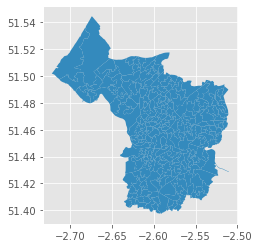

In [63]:
bristol_boundary.plot()

<AxesSubplot:>

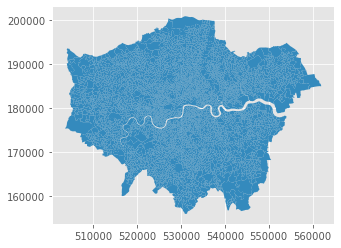

In [64]:
london_lsoa = gpd.read_file(os.path.join('code','statistical-gis-boundaries-london','ESRI','LSOA_2011_London_gen_MHW.shp'))
london_lsoa.plot()



In [65]:
london_lsoa['Borough'] = london_lsoa.MSOA11NM.str.replace(r' \d+$','',regex=True)
print(london_lsoa.Borough.unique())
print(len(london_lsoa.Borough.unique()))
print(london_lsoa.shape)

['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
33
(4835, 16)


In [66]:
london_lsoa.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Borough
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9000,876,1.7000,"POLYGON ((532105.092 182011.230, 532162.491 18...",City of London
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9000,830,1.7000,"POLYGON ((532746.813 181786.891, 532671.688 18...",City of London
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7000,817,1.5000,"POLYGON ((532135.145 182198.119, 532158.250 18...",City of London
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0000,467,2.1000,"POLYGON ((533807.946 180767.770, 533649.063 18...",City of London
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2000,543,3.1000,"POLYGON ((545122.049 184314.931, 545271.917 18...",Barking and Dagenham


In [67]:
lsoa_names = pd.read_csv(os.path.join('code','lsoa_name.csv'))



In [68]:
print(lsoa_names.columns.values)
lsoa_names.sample(3, random_state=42)

['LSOA11CD' 'LSOA11NM' 'FID']


,LSOA11CD,LSOA11NM,FID
28400,E01007243,Wirral 022D,28401
17126,E01018615,Cheshire East 017A,17127
26134,E01009709,Coventry 007F,26135


In [69]:
lsoas = pd.merge(london_lsoa, lsoa_names, left_on='LSOA11CD', right_on='LSOA11CD', how='left')
print(lsoas.shape)
print(type(lsoas))

(4835, 18)
<class 'geopandas.geodataframe.GeoDataFrame'>


In [70]:
lsoas.isna().sum()

LSOA11CD      0
LSOA11NM_x    0
MSOA11CD      0
MSOA11NM      0
LAD11CD       0
LAD11NM       0
RGN11CD       0
RGN11NM       0
USUALRES      0
HHOLDRES      0
COMESTRES     0
POPDEN        0
HHOLDS        0
AVHHOLDSZ     0
geometry      0
Borough       0
LSOA11NM_y    0
FID           0
dtype: int64

In [71]:
lsoas_camden = lsoas[lsoas.Borough=="Camden"]

In [72]:
lsoas_camden.to_file("camden.shp")

In [73]:
#lsoas_camden

In [74]:
## merge geo data and attribute data 
# we found that there are 6 lsoas in Camden have no transaction data. 
#It should be considered when building spatial models.

In [75]:
#check the missing data for all lsoas in camden
print(len(df0_camden_transaction.lsoa_code.unique()))
print(len(df0_camden_demg.lsoa_code.unique()))
print(len(camden_merge.lsoa_code.unique()))
print(len(lsoas_camden.LSOA11CD.unique()))

127
133
127
133


In [76]:
array1 = camden_merge.lsoa_code.unique()
array2 = lsoas_camden.LSOA11CD.unique()

In [77]:
np.setdiff1d(array2, array1)

array(['E01000925', 'E01000936', 'E01000941', 'E01000944', 'E01000949',
       'E01000950'], dtype=object)

In [78]:
#lsoas_camden[lsoas_camden['LSOA11CD'] == 'E01000950']

In [79]:
#check the missing data for all lsoas in bristol
print(len(df0_bristol_transaction.lsoa_code.unique()))
print(len(df0_bristol_demg.lsoa_code.unique()))
print(len(bristol_merge.lsoa_code.unique()))
#print(len(bristol_boundary.lsoa11cd.unique()))

263
263
263


<AxesSubplot:>

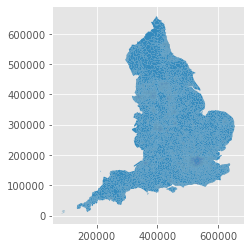

In [80]:
england_lsoa = gpd.read_file(os.path.join('code','England_lsoa_2011','england_lsoa_2011.shp'))
england_lsoa.plot()

In [81]:
england_lsoa.head()

,code,name,label,geometry
0,E01000037,Barking and Dagenham 003B,E09000002E02000004E01000037,"POLYGON ((551549.998 187364.637, 551528.633 18..."
1,E01000038,Barking and Dagenham 003C,E09000002E02000004E01000038,"POLYGON ((550920.362 187341.138, 550921.876 18..."
2,E01000039,Barking and Dagenham 003D,E09000002E02000004E01000039,"POLYGON ((551431.061 186927.155, 551444.481 18..."
3,E01000040,Barking and Dagenham 019A,E09000002E02000020E01000040,"POLYGON ((545806.481 184158.048, 545806.760 18..."
4,E01000041,Barking and Dagenham 017A,E09000002E02000018E01000041,"POLYGON ((547256.387 184393.166, 547256.625 18..."


<AxesSubplot:>

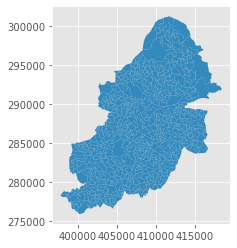

In [82]:
birmingham_lsoa = england_lsoa[england_lsoa['name'].str.contains("Birmingham")]
birmingham_lsoa.plot()

In [83]:
birmingham_lsoa.to_file("Birmingham.shp")

In [84]:
birmingham_lsoa = birmingham_lsoa.rename({'code':'lsoa_code'},axis = 'columns')

In [85]:
#check the missing data for all lsoas in birmingham
print(len(df0_birmingham_transaction.lsoa_code.unique()))
print(len(df0_birmingham_demg.lsoa_code.unique()))
print(len(birmingham_merge.lsoa_code.unique()))
print(len(birmingham_lsoa.lsoa_code.unique()))

633
639
633
639


## We visualise the merged data (total price and unit price). Also, we analyse the representive house price for four types of properties. 

In [86]:
len(bristol_merge.lsoa_code)

3733

In [87]:
bristol_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,132500,"2,880.4348",N,F,46.0000,2,"Bristol, City of",South West,E01014707,E02003060,2019-09-20,Bristol 049F,45.7184,35,207,164,1591,45
1,803000,"4,779.7619",N,T,168.0000,10,"Bristol, City of",South West,E01014616,E02003017,2019-07-12,Bristol 006A,40.1213,9,137,36,1475,52
2,215000,"2,654.3210",N,T,81.0000,5,"Bristol, City of",South West,E01032515,E02003064,2019-01-24,Bristol 053F,12.9105,72,152,246,1371,201
3,174000,"3,163.6364",N,F,55.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-02-14,Bristol 033A,29.2063,24,178,107,1413,29
4,352000,"3,485.1485",N,T,101.0000,4,"Bristol, City of",South West,E01033364,E02003050,2019-02-28,Bristol 039H,101.8313,30,143,92,1557,103


In [88]:
bristol_merge[bristol_merge.lsoa_code == 'E01014677']

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
3,174000,"3,163.6364",N,F,55.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-02-14,Bristol 033A,29.2063,24,178,107,1413,29
131,297500,"3,164.8936",N,D,94.0000,5,"Bristol, City of",South West,E01014677,E02003044,2019-04-18,Bristol 033A,29.2063,24,178,107,1413,29
294,207500,"3,143.9394",N,T,66.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-05-16,Bristol 033A,29.2063,24,178,107,1413,29
316,260000,"2,888.8889",N,T,90.0000,5,"Bristol, City of",South West,E01014677,E02003044,2019-01-04,Bristol 033A,29.2063,24,178,107,1413,29
545,320000,"3,362.7575",N,D,95.1600,5,"Bristol, City of",South West,E01014677,E02003044,2019-09-05,Bristol 033A,29.2063,24,178,107,1413,29
642,230000,"3,285.7143",N,T,70.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-05-17,Bristol 033A,29.2063,24,178,107,1413,29
681,347000,"3,126.1261",N,D,111.0000,6,"Bristol, City of",South West,E01014677,E02003044,2019-01-15,Bristol 033A,29.2063,24,178,107,1413,29
938,169250,"3,254.8077",N,F,52.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-04-18,Bristol 033A,29.2063,24,178,107,1413,29
1078,250000,"2,941.1765",N,S,85.0000,5,"Bristol, City of",South West,E01014677,E02003044,2019-02-18,Bristol 033A,29.2063,24,178,107,1413,29
1110,220000,"3,235.2941",N,T,68.0000,4,"Bristol, City of",South West,E01014677,E02003044,2019-06-21,Bristol 033A,29.2063,24,178,107,1413,29


In [89]:

# data = {'price':[10,2,15,7,8,9],
#         'code':['E01014707','E01014707','E01014707','E01014616','E01032515','E01014677']}
  
# # Create DataFrame
# df = pd.DataFrame(data)
  
# # Print the output.
# df

In [90]:
# df_group = df.groupby('code', as_index=False)['price'].mean()

In [91]:
# geo = df_group.set_index('code').join(bristol_boundary.set_index('lsoa11cd'))
# geo.isnull().sum()
# geo = GeoDataFrame(geo)

#geo_group = geogroupby('code', as_index=False)['price'].mean()

# fig, ax = plt.subplots(1, figsize=(10, 8))
# geo.plot(column='price', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8')
# ax.axis('off')
# ax.set_title('Total house price in Bristol(LSOA)', fontdict={'fontsize': '15', 'fontweight' : '3'})
# x, y, arrow_length = 0.1, 0.3, 0.1
# # ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
# #             arrowprops=dict(facecolor='black', width=5, headwidth=15),
# #             ha='center', va='center', fontsize=20,
# #             xycoords=ax.transAxes)
# sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=geo.price.min(), vmax=geo.price.max()))
# cbar = fig.colorbar(sm)

In [92]:
# geo.head()

In [93]:
bristol_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,132500,"2,880.4348",N,F,46.0000,2,"Bristol, City of",South West,E01014707,E02003060,2019-09-20,Bristol 049F,45.7184,35,207,164,1591,45
1,803000,"4,779.7619",N,T,168.0000,10,"Bristol, City of",South West,E01014616,E02003017,2019-07-12,Bristol 006A,40.1213,9,137,36,1475,52
2,215000,"2,654.3210",N,T,81.0000,5,"Bristol, City of",South West,E01032515,E02003064,2019-01-24,Bristol 053F,12.9105,72,152,246,1371,201
3,174000,"3,163.6364",N,F,55.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-02-14,Bristol 033A,29.2063,24,178,107,1413,29
4,352000,"3,485.1485",N,T,101.0000,4,"Bristol, City of",South West,E01033364,E02003050,2019-02-28,Bristol 039H,101.8313,30,143,92,1557,103


In [94]:
bristol_merge_group_total = bristol_merge.groupby('lsoa_code', as_index=False)['total_price'].mean()
bristol_merge_group_unit = bristol_merge.groupby('lsoa_code', as_index=False)['unit_price'].mean()

In [95]:
bristol_merge_group_total.to_excel(os.path.join('code','bristol_group_total.xlsx'),index = False)
bristol_merge_group_unit.to_excel(os.path.join('code','bristol_group_unit.xlsx'),index = False)

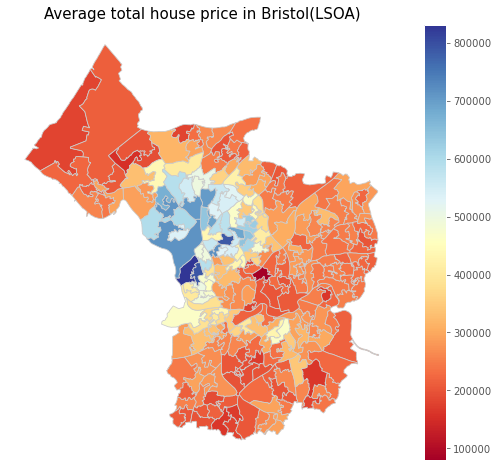

In [96]:

bristol_merge_geo = bristol_merge_group_total.set_index('lsoa_code').join(bristol_boundary.set_index('lsoa11cd'))
bristol_merge_geo.isnull().sum()
bristol_merge_geo = GeoDataFrame(bristol_merge_geo)


#type(bristol_merge_geo)
# bristol_merge_geo
# print(np.shape(merged))
fig, ax = plt.subplots(1, figsize=(10, 8))
bristol_merge_geo.plot(column='total_price', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Average total house price in Bristol(LSOA)', fontdict={'fontsize': '15', 'fontweight' : '3'})
x, y, arrow_length = 0.1, 0.3, 0.1
# ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
#             arrowprops=dict(facecolor='black', width=5, headwidth=15),
#             ha='center', va='center', fontsize=20,
#             xycoords=ax.transAxes)
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=bristol_merge_geo.total_price.min(), vmax=bristol_merge_geo.total_price.max()))
cbar = fig.colorbar(sm)

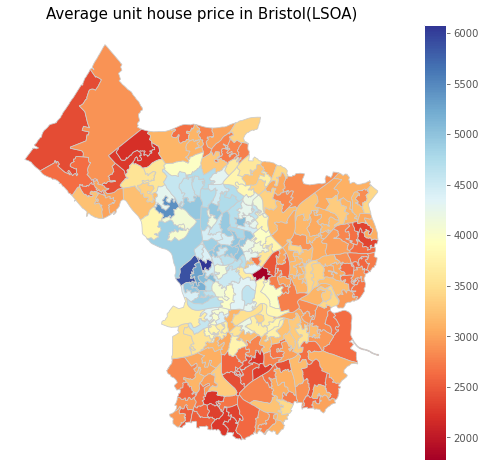

In [97]:
#type(bristol_merge_geo)
# bristol_merge_geo
# print(np.shape(merged))

bristol_merge_geo = bristol_merge_group_unit.set_index('lsoa_code').join(bristol_boundary.set_index('lsoa11cd'))
bristol_merge_geo.isnull().sum()
bristol_merge_geo = GeoDataFrame(bristol_merge_geo)

fig, ax = plt.subplots(1, figsize=(10, 8))
bristol_merge_geo.plot(column='unit_price', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Average unit house price in Bristol(LSOA)', fontdict={'fontsize': '15', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=bristol_merge_geo.unit_price.min(), vmax=bristol_merge_geo.unit_price.max()))
cbar = fig.colorbar(sm)

In [98]:
camden_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
0,415000,"8,321.6363",N,F,49.8700,2,Camden,London,E01000974,E02000178,2019-09-04,Camden 013E,156.0976,64,63.6000,230,0.4093,294
1,1172500,"9,770.8333",N,T,120.0000,4,Camden,London,E01000900,E02000177,2019-09-20,Camden 012A,187.8270,96,61.6000,282,0.4161,325
2,2205000,"17,093.0233",N,D,129.0000,4,Camden,London,E01000913,E02000166,2019-07-09,Camden 001E,10.9833,139,71.8000,70,1.2368,14
3,3300000,"13,043.4783",N,T,253.0000,8,Camden,London,E01000849,E02000176,2019-02-14,Camden 011D,216.3449,86,74.8000,76,0.4200,63
4,769595,"8,275.2151",N,F,93.0000,4,Camden,London,E01000904,E02000177,2019-01-31,Camden 012C,190.5579,100,58.4000,315,0.3878,478


In [99]:
camden_merge_group_total = camden_merge.groupby('lsoa_code', as_index=False)['total_price'].mean()
camden_merge_group_unit = camden_merge.groupby('lsoa_code', as_index=False)['unit_price'].mean()

In [100]:
camden_merge_group_total.to_excel(os.path.join('code','camden_group_total.xlsx'),index = False)
camden_merge_group_unit.to_excel(os.path.join('code','camden_group_unit.xlsx'),index = False)

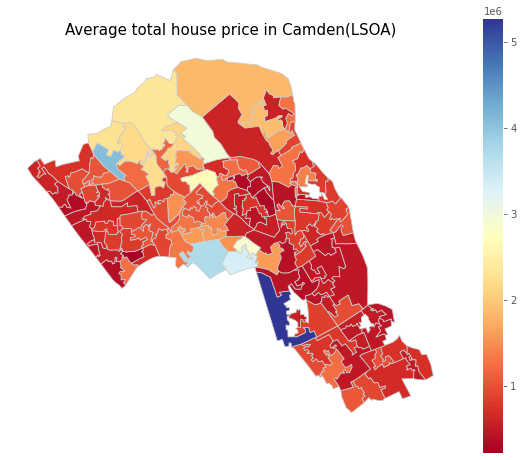

In [101]:
camden_merge_geo = camden_merge_group_total.set_index('lsoa_code').join(lsoas_camden.set_index('LSOA11CD'))
camden_merge_geo.isnull().sum()
camden_merge_geo = GeoDataFrame(camden_merge_geo)

#camden_merge_geo.columns
#type(bristol_merge_geo)
# bristol_merge_geo
# print(np.shape(merged))
fig, ax = plt.subplots(1, figsize=(10, 8))
camden_merge_geo.plot(column='total_price', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Average total house price in Camden(LSOA)', fontdict={'fontsize': '15', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=camden_merge_geo.total_price.min(), vmax=camden_merge_geo.total_price.max()))
cbar = fig.colorbar(sm)

In [102]:
camden_merge_geo.total_price.isna()

lsoa_code
E01000842    False
E01000843    False
E01000844    False
E01000845    False
E01000846    False
E01000847    False
E01000848    False
E01000849    False
E01000850    False
E01000851    False
E01000852    False
E01000853    False
E01000854    False
E01000855    False
E01000856    False
E01000857    False
E01000858    False
E01000859    False
E01000860    False
E01000861    False
E01000862    False
E01000863    False
E01000864    False
E01000865    False
E01000866    False
E01000867    False
E01000868    False
E01000869    False
E01000870    False
E01000871    False
E01000872    False
E01000873    False
E01000874    False
E01000875    False
E01000876    False
E01000877    False
E01000878    False
E01000879    False
E01000880    False
E01000881    False
E01000882    False
E01000883    False
E01000884    False
E01000885    False
E01000886    False
E01000887    False
E01000888    False
E01000889    False
E01000890    False
E01000891    False
E01000892    False
E01000893    False
E0

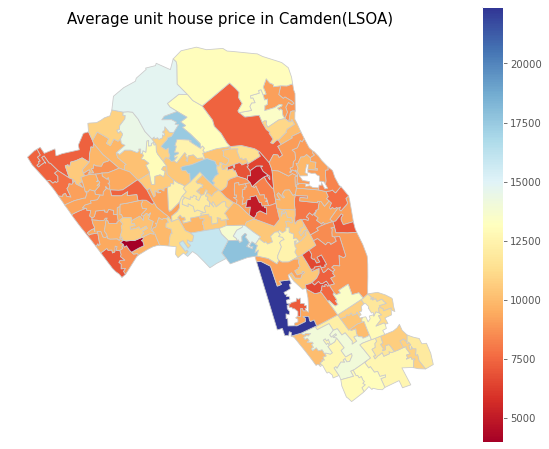

In [103]:
camden_merge_geo = camden_merge_group_unit.set_index('lsoa_code').join(lsoas_camden.set_index('LSOA11CD'))
camden_merge_geo.isnull().sum()
camden_merge_geo = GeoDataFrame(camden_merge_geo)


#type(bristol_merge_geo)
# bristol_merge_geo
# print(np.shape(merged))
fig, ax = plt.subplots(1, figsize=(10, 8))
camden_merge_geo.plot(column='unit_price', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Average unit house price in Camden(LSOA)', fontdict={'fontsize': '15', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=camden_merge_geo.unit_price.min(), vmax=camden_merge_geo.unit_price.max()))
cbar = fig.colorbar(sm)

In [104]:
###### Birmingham 

In [105]:
birmingham_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,185000,"2,010.8696",N,S,92.0000,5,Birmingham,West Midlands,E01008949,E02001948,2019-01-18,Birmingham 122E,64.8510,34,128,95,1262,6
1,140000,"2,187.5000",N,T,64.0000,3,Birmingham,West Midlands,E01009228,E02001839,2019-01-07,Birmingham 013D,68.0772,69,170,183,1657,27
2,310000,"2,924.5283",N,T,106.0000,4,Birmingham,West Midlands,E01009068,E02001901,2019-03-15,Birmingham 075C,70.7149,29,112,47,1543,76
3,202500,"2,596.1538",N,S,78.0000,4,Birmingham,West Midlands,E01009455,E02001831,2019-06-14,Birmingham 005F,64.5366,57,134,183,1322,373
4,125000,"1,524.3902",N,T,82.0000,5,Birmingham,West Midlands,E01009103,E02001855,2019-01-04,Birmingham 029E,58.1158,116,149,310,1536,433


In [106]:
birmingham_merge_group_total = birmingham_merge.groupby('lsoa_code', as_index=False)['total_price'].mean()
birmingham_merge_group_unit = birmingham_merge.groupby('lsoa_code', as_index=False)['unit_price'].mean()

In [107]:
birmingham_merge_group_total.to_excel(os.path.join('code','birmingham_group_total.xlsx'),index = False)
birmingham_merge_group_unit.to_excel(os.path.join('code','birmingham_group_unit.xlsx'),index = False)

In [108]:
birmingham_merge_geo = birmingham_merge_group_total.set_index('lsoa_code').join(birmingham_lsoa.set_index('lsoa_code'))
birmingham_merge_geo.isnull().sum()
birmingham_merge_geo = GeoDataFrame(birmingham_merge_geo)

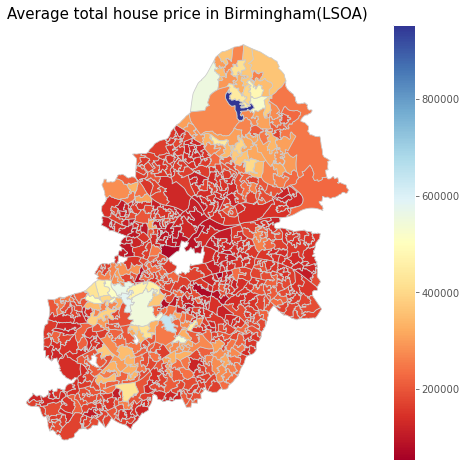

In [109]:
fig, ax = plt.subplots(1, figsize=(10, 8))
birmingham_merge_geo.plot(column='total_price', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Average total house price in Birmingham(LSOA)', fontdict={'fontsize': '15', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=birmingham_merge_geo.total_price.min(), vmax=birmingham_merge_geo.total_price.max()))
cbar = fig.colorbar(sm)

In [110]:
birmingham_merge_geo.total_price.isna()

lsoa_code
E01008881    False
E01008882    False
E01008883    False
E01008884    False
E01008885    False
             ...  
E01033646    False
E01033647    False
E01033648    False
E01033649    False
E01033650    False
Name: total_price, Length: 633, dtype: bool

In [111]:
birmingham_merge_geo = birmingham_merge_group_unit.set_index('lsoa_code').join(birmingham_lsoa.set_index('lsoa_code'))
birmingham_merge_geo.isnull().sum()
birmingham_merge_geo = GeoDataFrame(birmingham_merge_geo)

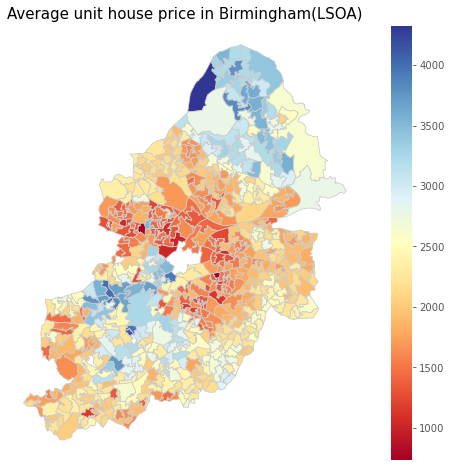

In [112]:

fig, ax = plt.subplots(1, figsize=(10, 8))
birmingham_merge_geo.plot(column='unit_price', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Average unit house price in Birmingham(LSOA)', fontdict={'fontsize': '15', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=birmingham_merge_geo.unit_price.min(), vmax=birmingham_merge_geo.unit_price.max()))
cbar = fig.colorbar(sm)

## We explored the prices for 4 different types of property in camden and bristol. 

### Camden

In [113]:
# camden_merge_geo = camden_merge.set_index('lsoa_code').join(lsoas_camden.set_index('LSOA11CD'))
# camden_merge_geo = GeoDataFrame(camden_merge_geo)

In [114]:
# camden_merge_geo.columns

In [115]:
camden_merge.property_type.unique()#F: Flats/Maisonettes, T:Terraced, D: Detached, S:Semi-Detached

array(['F', 'T', 'D', 'S'], dtype=object)

In [116]:
camden_F = camden_merge[camden_merge.property_type == 'F']
camden_T = camden_merge[camden_merge.property_type == 'T']
camden_D = camden_merge[camden_merge.property_type == 'D']
camden_S = camden_merge[camden_merge.property_type == 'S']

In [117]:
camden_F.columns

Index(['total_price', 'unit_price', 'old_new', 'property_type', 'floor_area',
       'room_number', 'local_authority', 'region', 'lsoa_code', 'msoa_code',
       'date', 'Names', 'population_density', 'num_of_household_with_children',
       'employment_rate', 'num_of_no_qualification', 'car_per_household',
       'social_rented_tenure_per_household'],
      dtype='object')

In [118]:
# print(len(camden_F.lsoa_code.unique()))
# print(len(camden_T.lsoa_code.unique()))
# print(len(camden_D.lsoa_code.unique()))
# print(len(camden_S.lsoa_code.unique()))

In [119]:
print(f'The mean total house (Flats/Maisonettes) price in Camden is {camden_F.total_price.mean()}')
print(f'The median total house (Flats/Maisonettes) price in Camden is {camden_F.total_price.median()}')
print(f'The max total house (Flats/Maisonettes) price in Camden is {camden_F.total_price.max()}')
print(f'The min total house (Flats/Maisonettes) price in Camden is {camden_F.total_price.min()}')
print('')
print(f'The mean unit house (Flats/Maisonettes) price in Camden is {camden_F.unit_price.mean()}')
print(f'The median unit house (Flats/Maisonettes) price in Camden is {camden_F.unit_price.median()}')
print(f'The max unit house (Flats/Maisonettes) price in Camden is {camden_F.unit_price.max()}')
print(f'The min unit house (Flats/Maisonettes) price in Camden is {camden_F.unit_price.min()}')

The mean total house (Flats/Maisonettes) price in Camden is 751748.4344122658
The median total house (Flats/Maisonettes) price in Camden is 610000.0
The max total house (Flats/Maisonettes) price in Camden is 4950000
The min total house (Flats/Maisonettes) price in Camden is 200000

The mean unit house (Flats/Maisonettes) price in Camden is 10007.286850732611
The median unit house (Flats/Maisonettes) price in Camden is 9836.95652173913
The max unit house (Flats/Maisonettes) price in Camden is 25290.6537822739
The min unit house (Flats/Maisonettes) price in Camden is 3770.49180327869


In [120]:
print(f'The mean total house (Terraced) price in Camden is {camden_T.total_price.mean()}')
print(f'The median total house (Terraced) price in Camden is {camden_T.total_price.median()}')
print(f'The max total house (Terraced) price in Camden is {camden_T.total_price.max()}')
print(f'The min total house (Terraced) price in Camden is {camden_T.total_price.min()}')
print('')
print(f'The mean unit house (Terraced) price in Camden is {camden_T.unit_price.mean()}')
print(f'The median unit house (Terraced) price in Camden is {camden_T.unit_price.median()}')
print(f'The max unit house (Terraced) price in Camden is {camden_T.unit_price.max()}')
print(f'The min unit house (Terraced) price in Camden is {camden_T.unit_price.min()}')

The mean total house (Terraced) price in Camden is 2170481.25
The median total house (Terraced) price in Camden is 1615000.0
The max total house (Terraced) price in Camden is 15500000
The min total house (Terraced) price in Camden is 475000

The mean unit house (Terraced) price in Camden is 12670.211788730228
The median unit house (Terraced) price in Camden is 11431.813146783701
The max unit house (Terraced) price in Camden is 44444.4444444444
The min unit house (Terraced) price in Camden is 2840.23668639053


In [121]:
print(f'The mean total house (Detached) price in Camden is {camden_D.total_price.mean()}')
print(f'The median total house (Detached) price in Camden is {camden_D.total_price.median()}')
print(f'The max total house (Detached) price in Camden is {camden_D.total_price.max()}')
print(f'The min total house (Detached) price in Camden is {camden_D.total_price.min()}')
print('')
print(f'The mean unit house (Detached) price in Camden is {camden_D.unit_price.mean()}')
print(f'The median unit house (Detached) price in Camden is {camden_D.unit_price.median()}')
print(f'The max unit house (Detached) price in Camden is {camden_D.unit_price.max()}')
print(f'The min unit house (Detached) price in Camden is {camden_D.unit_price.min()}')

The mean total house (Detached) price in Camden is 4784375.652173913
The median total house (Detached) price in Camden is 3650000.0
The max total house (Detached) price in Camden is 13500000
The min total house (Detached) price in Camden is 1345000

The mean unit house (Detached) price in Camden is 15129.148557988317
The median unit house (Detached) price in Camden is 13519.313304721
The max unit house (Detached) price in Camden is 32219.5704057279
The min unit house (Detached) price in Camden is 9722.22222222222


In [122]:
print(f'The mean total house (Semi-Detached) price in Camden is {camden_S.total_price.mean()}')
print(f'The median total house (Semi-Detached) price in Camden is {camden_S.total_price.median()}')
print(f'The max total house (Semi-Detached) price in Camden is {camden_S.total_price.max()}')
print(f'The min total house (Semi-Detached) price in Camden is {camden_S.total_price.min()}')
print('')
print(f'The mean unit house (Semi-Detached) price in Camden is {camden_S.unit_price.mean()}')
print(f'The median unit house (Semi-Detached) price in Camden is {camden_S.unit_price.median()}')
print(f'The max unit house (Semi-Detached) price in Camden is {camden_S.unit_price.max()}')
print(f'The min unit house (Semi-Detached) price in Camden is {camden_S.unit_price.min()}')

The mean total house (Semi-Detached) price in Camden is 2448711.3225806453
The median total house (Semi-Detached) price in Camden is 2000000.0
The max total house (Semi-Detached) price in Camden is 7800000
The min total house (Semi-Detached) price in Camden is 775000

The mean unit house (Semi-Detached) price in Camden is 12538.876605917503
The median unit house (Semi-Detached) price in Camden is 11507.9365079365
The max unit house (Semi-Detached) price in Camden is 34090.9090909091
The min unit house (Semi-Detached) price in Camden is 4600.84033613445


### Bristol 

In [123]:
bristol_merge.property_type.unique()#F: Flats/Maisonettes, T:Terraced, D: Detached, S:Semi-Detached

array(['F', 'T', 'S', 'D'], dtype=object)

In [124]:
bristol_F = bristol_merge[bristol_merge.property_type == 'F']
bristol_T = bristol_merge[bristol_merge.property_type == 'T']
bristol_D = bristol_merge[bristol_merge.property_type == 'D']
bristol_S = bristol_merge[bristol_merge.property_type == 'S']

In [125]:
bristol_F.columns

Index(['total_price', 'unit_price', 'old_new', 'property_type', 'floor_area',
       'room_number', 'local_authority', 'region', 'lsoa_code', 'msoa_code',
       'date', 'Names', 'population_density', 'num_of_household_with_children',
       'employment_num', 'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household'],
      dtype='object')

In [126]:
print(f'The mean total house (Flats/Maisonettes) price in Bristol is {bristol_F.total_price.mean()}')
print(f'The median total house (Flats/Maisonettes) price in Bristol is {bristol_F.total_price.median()}')
print(f'The max total house (Flats/Maisonettes) price in Bristol is {bristol_F.total_price.max()}')
print(f'The min total house (Flats/Maisonettes) price in Bristol is {bristol_F.total_price.min()}')
print('')
print(f'The mean unit house (Flats/Maisonettes) price in Bristol is {bristol_F.unit_price.mean()}')
print(f'The median unit house (Flats/Maisonettes) price in Bristol is {bristol_F.unit_price.median()}')
print(f'The max unit house (Flats/Maisonettes) price in Bristol is {bristol_F.unit_price.max()}')
print(f'The min unit house (Flats/Maisonettes) price in Bristol is {bristol_F.unit_price.min()}')

The mean total house (Flats/Maisonettes) price in Bristol is 237984.67525773196
The median total house (Flats/Maisonettes) price in Bristol is 200250.0
The max total house (Flats/Maisonettes) price in Bristol is 1200000
The min total house (Flats/Maisonettes) price in Bristol is 54750

The mean unit house (Flats/Maisonettes) price in Bristol is 3798.2370866989145
The median unit house (Flats/Maisonettes) price in Bristol is 3750.0
The max unit house (Flats/Maisonettes) price in Bristol is 9090.90909090909
The min unit house (Flats/Maisonettes) price in Bristol is 730.0


In [127]:
print(f'The mean total house (Terraced) price in Bristol is {bristol_T.total_price.mean()}')
print(f'The median total house (Terraced) price in Bristol is {bristol_T.total_price.median()}')
print(f'The max total house (Terraced) price in Bristol is {bristol_T.total_price.max()}')
print(f'The min total house (Terraced) price in Bristol is {bristol_T.total_price.min()}')
print('')
print(f'The mean unit house (Terraced) price in Bristol is {bristol_T.unit_price.mean()}')
print(f'The median unit house (Terraced) price in Bristol is {bristol_T.unit_price.median()}')
print(f'The max unit house (Terraced) price in Bristol is {bristol_T.unit_price.max()}')
print(f'The min unit house (Terraced) price in Bristol is {bristol_T.unit_price.min()}')

The mean total house (Terraced) price in Bristol is 320137.01898380794
The median total house (Terraced) price in Bristol is 281250.0
The max total house (Terraced) price in Bristol is 1590000
The min total house (Terraced) price in Bristol is 100000

The mean unit house (Terraced) price in Bristol is 3340.775559247709
The median unit house (Terraced) price in Bristol is 3194.44444444444
The max unit house (Terraced) price in Bristol is 17380.9523809524
The min unit house (Terraced) price in Bristol is 1030.92783505155


In [128]:
print(f'The mean total house (Detached) price in Bristol is {bristol_D.total_price.mean()}')
print(f'The median total house (Detached) price in Bristol is {bristol_D.total_price.median()}')
print(f'The max total house (Detached) price in Bristol is {bristol_D.total_price.max()}')
print(f'The min total house (Detached) price in Bristol is {bristol_D.total_price.min()}')
print('')
print(f'The mean unit house (Detached) price in Bristol is {bristol_D.unit_price.mean()}')
print(f'The median unit house (Detached) price in Bristol is {bristol_D.unit_price.median()}')
print(f'The max unit house (Detached) price in Bristol is {bristol_D.unit_price.max()}')
print(f'The min unit house (Detached) price in Bristol is {bristol_D.unit_price.min()}')

The mean total house (Detached) price in Bristol is 559352.0871559633
The median total house (Detached) price in Bristol is 432500.0
The max total house (Detached) price in Bristol is 1800000
The min total house (Detached) price in Bristol is 150000

The mean unit house (Detached) price in Bristol is 3930.0096165031573
The median unit house (Detached) price in Bristol is 3749.66261808367
The max unit house (Detached) price in Bristol is 7905.38033395176
The min unit house (Detached) price in Bristol is 1851.85185185185


In [129]:
print(f'The mean total house (Semi-Detached) price in Bristol is {bristol_S.total_price.mean()}')
print(f'The median total house (Semi-Detached) price in Bristol is {bristol_S.total_price.median()}')
print(f'The max total house (Semi-Detached) price in Bristol is {bristol_S.total_price.max()}')
print(f'The min total house (Semi-Detached) price in Bristol is {bristol_S.total_price.min()}')
print('')
print(f'The mean unit house (Semi-Detached) price in Bristol is {bristol_S.unit_price.mean()}')
print(f'The median unit house (Semi-Detached) price in Bristol is {bristol_S.unit_price.median()}')
print(f'The max unit house (Semi-Detached) price in Bristol is {bristol_S.unit_price.max()}')
print(f'The min unit house (Semi-Detached) price in Bristol is {bristol_S.unit_price.min()}')

The mean total house (Semi-Detached) price in Bristol is 345532.69620253163
The median total house (Semi-Detached) price in Bristol is 275000.0
The max total house (Semi-Detached) price in Bristol is 1450000
The min total house (Semi-Detached) price in Bristol is 80000

The mean unit house (Semi-Detached) price in Bristol is 3359.7122550953322
The median unit house (Semi-Detached) price in Bristol is 3185.60074801309
The max unit house (Semi-Detached) price in Bristol is 18534.3598517251
The min unit house (Semi-Detached) price in Bristol is 869.565217391304


In [130]:
### Birmingham 

In [131]:
birmingham_merge.property_type.unique()#F: Flats/Maisonettes, T:Terraced, D: Detached, S:Semi-Detached

array(['S', 'T', 'F', 'D'], dtype=object)

In [132]:
birmingham_F = birmingham_merge[birmingham_merge.property_type == 'F']
birmingham_T = birmingham_merge[birmingham_merge.property_type == 'T']
birmingham_D = birmingham_merge[birmingham_merge.property_type == 'D']
birmingham_S = birmingham_merge[birmingham_merge.property_type == 'S']

In [133]:
birmingham_F.columns

Index(['total_price', 'unit_price', 'old_new', 'property_type', 'floor_area',
       'room_number', 'local_authority', 'region', 'lsoa_code', 'msoa_code',
       'date', 'Names', 'population_density', 'num_of_household_with_children',
       'employment_num', 'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household'],
      dtype='object')

In [134]:
print(f'The mean total house (Flats/Maisonettes) price in birmingham is {birmingham_F.total_price.mean()}')
print(f'The median total house (Flats/Maisonettes) price in birmingham is {camden_F.total_price.median()}')
print(f'The max total house (Flats/Maisonettes) price in birmingham is {birmingham_F.total_price.max()}')
print(f'The min total house (Flats/Maisonettes) price in birmingham is {birmingham_F.total_price.min()}')
print('')
print(f'The mean unit house (Flats/Maisonettes) price in birmingham is {birmingham_F.unit_price.mean()}')
print(f'The median unit house (Flats/Maisonettes) price in birmingham is {birmingham_F.unit_price.median()}')
print(f'The max unit house (Flats/Maisonettes) price in birmingham is {birmingham_F.unit_price.max()}')
print(f'The min unit house (Flats/Maisonettes) price in birmingham is {birmingham_F.unit_price.min()}')

The mean total house (Flats/Maisonettes) price in birmingham is 140375.41751152073
The median total house (Flats/Maisonettes) price in birmingham is 610000.0
The max total house (Flats/Maisonettes) price in birmingham is 615000
The min total house (Flats/Maisonettes) price in birmingham is 41250

The mean unit house (Flats/Maisonettes) price in birmingham is 2326.086813398198
The median unit house (Flats/Maisonettes) price in birmingham is 2229.16666666667
The max unit house (Flats/Maisonettes) price in birmingham is 7784.83885610531
The min unit house (Flats/Maisonettes) price in birmingham is 518.518518518518


In [135]:
print(f'The mean total house (Terraced) price in birmingham is {birmingham_T.total_price.mean()}')
print(f'The median total house (Terraced) price in birmingham is {birmingham_T.total_price.median()}')
print(f'The max total house (Terraced) price in birmingham is {birmingham_T.total_price.max()}')
print(f'The min total house (Terraced) price in birmingham is {birmingham_T.total_price.min()}')
print('')
print(f'The mean unit house (Terraced) price in birmingham is {birmingham_T.unit_price.mean()}')
print(f'The median unit house (Terraced) price in birmingham is {birmingham_T.unit_price.median()}')
print(f'The max unit house (Terraced) price in birmingham is {birmingham_T.unit_price.max()}')
print(f'The min unit house (Terraced) price in birmingham is {birmingham_T.unit_price.min()}')

The mean total house (Terraced) price in birmingham is 172819.67134062928
The median total house (Terraced) price in birmingham is 155000.0
The max total house (Terraced) price in birmingham is 862500
The min total house (Terraced) price in birmingham is 43200

The mean unit house (Terraced) price in birmingham is 2058.743066363522
The median unit house (Terraced) price in birmingham is 1948.05194805195
The max unit house (Terraced) price in birmingham is 6825.62795777212
The min unit house (Terraced) price in birmingham is 292.553191489362


In [136]:
print(f'The mean total house (Detached) price in birmingham is {birmingham_D.total_price.mean()}')
print(f'The median total house (Detached) price in birmingham is {birmingham_D.total_price.median()}')
print(f'The max total house (Detached) price in birmingham is {birmingham_D.total_price.max()}')
print(f'The min total house (Detached) price in birmingham is {birmingham_D.total_price.min()}')
print('')
print(f'The mean unit house (Detached) price in birmingham is {birmingham_D.unit_price.mean()}')
print(f'The median unit house (Detached) price in birmingham is {birmingham_D.unit_price.median()}')
print(f'The max unit house (Detached) price in birmingham is {birmingham_D.unit_price.max()}')
print(f'The min unit house (Detached) price in birmingham is {birmingham_D.unit_price.min()}')


The mean total house (Detached) price in birmingham is 432301.1141618497
The median total house (Detached) price in birmingham is 370000.0
The max total house (Detached) price in birmingham is 4725000
The min total house (Detached) price in birmingham is 132000

The mean unit house (Detached) price in birmingham is 3225.4968105792177
The median unit house (Detached) price in birmingham is 3175.5368814192298
The max unit house (Detached) price in birmingham is 7861.89683860233
The min unit house (Detached) price in birmingham is 846.153846153846


In [137]:
print(f'The mean total house (Semi-Detached) price in birmingham is {birmingham_S.total_price.mean()}')
print(f'The median total house (Semi-Detached) price in birmingham is {birmingham_S.total_price.median()}')
print(f'The max total house (Semi-Detached) price in birmingham is {birmingham_S.total_price.max()}')
print(f'The min total house (Semi-Detached) price in birmingham is {birmingham_S.total_price.min()}')
print('')
print(f'The mean unit house (Semi-Detached) price in birmingham is {birmingham_S.unit_price.mean()}')
print(f'The median unit house (Semi-Detached) price in birmingham is {birmingham_S.unit_price.median()}')
print(f'The max unit house (Semi-Detached) price in birmingham is {birmingham_S.unit_price.max()}')
print(f'The min unit house (Semi-Detached) price in birmingham is {birmingham_S.unit_price.min()}')

The mean total house (Semi-Detached) price in birmingham is 221714.63772893773
The median total house (Semi-Detached) price in birmingham is 200000.0
The max total house (Semi-Detached) price in birmingham is 1075000
The min total house (Semi-Detached) price in birmingham is 54500

The mean unit house (Semi-Detached) price in birmingham is 2469.2525414585507
The median unit house (Semi-Detached) price in birmingham is 2395.905317360235
The max unit house (Semi-Detached) price in birmingham is 8285.461776403
The min unit house (Semi-Detached) price in birmingham is 324.19289477239


In [138]:
#result
#F: Flats/Maisonettes, T:Terraced, D: Detached, S:Semi-Detached

#Camden: D > T > S > F
#Bristol: D > F > S > T
#Birmingham unit: D > s > t > f
#Birmingham total: D > s > F > T

In [139]:
#combination of two graphs 
# f,axes = plt.subplots(1,2,figsize=(15,10))
# camden_merge_geo.plot(column='total_price', ax=axes[0], legend=True, cmap='RdYlBu')
# bristol_merge_geo.copy().plot(column='total_price', ax=axes[1], legend=True, cmap='RdYlBu')
# for ax in axes:
#     ax.axis('off')
# axes[0].set_title('Median Price', size=2)
# axes[1].set_title('Listings', size=2)

In [140]:
#camden_merge, bristol_merge

## We explore the statsitics of merged data in this stage. 

### Camden 

In [141]:
camden_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
0,415000,"8,321.6363",N,F,49.8700,2,Camden,London,E01000974,E02000178,2019-09-04,Camden 013E,156.0976,64,63.6000,230,0.4093,294
1,1172500,"9,770.8333",N,T,120.0000,4,Camden,London,E01000900,E02000177,2019-09-20,Camden 012A,187.8270,96,61.6000,282,0.4161,325
2,2205000,"17,093.0233",N,D,129.0000,4,Camden,London,E01000913,E02000166,2019-07-09,Camden 001E,10.9833,139,71.8000,70,1.2368,14
3,3300000,"13,043.4783",N,T,253.0000,8,Camden,London,E01000849,E02000176,2019-02-14,Camden 011D,216.3449,86,74.8000,76,0.4200,63
4,769595,"8,275.2151",N,F,93.0000,4,Camden,London,E01000904,E02000177,2019-01-31,Camden 012C,190.5579,100,58.4000,315,0.3878,478


In [142]:
camden_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   total_price                         761 non-null    int64         
 1   unit_price                          761 non-null    float64       
 2   old_new                             761 non-null    object        
 3   property_type                       761 non-null    object        
 4   floor_area                          761 non-null    float64       
 5   room_number                         761 non-null    int64         
 6   local_authority                     761 non-null    object        
 7   region                              761 non-null    object        
 8   lsoa_code                           761 non-null    object        
 9   msoa_code                           761 non-null    object        
 10  date                      

In [143]:
camden_merge.describe()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
count,761.0000,761.0000,761.0000,761.0000,761.0000,761.0000,761.0000,761.0000,761.0000,761.0000
mean,"1,166,471.4481","10,685.1227",101.2215,3.9054,133.9164,97.4573,64.8288,145.6662,0.5533,188.2773
std,"1,404,408.3805","3,914.4630",79.6758,2.1482,58.9516,30.6584,10.1032,81.8016,0.2267,142.9135
min,"200,000.0000","2,840.2367",16.5200,1.0000,10.9833,22.0000,26.0000,34.0000,0.1574,12.0000
25%,"496,500.0000","8,500.0000",54.0000,2.0000,98.2246,77.0000,59.2000,78.0000,0.4093,71.0000
50%,"720,000.0000","10,091.7431",76.8000,3.0000,139.1122,98.0000,66.0000,124.0000,0.5229,154.0000
75%,"1,295,000.0000","12,058.8235",120.0000,5.0000,172.9949,119.0000,72.7000,192.0000,0.6722,275.0000
max,"15,500,000.0000","44,444.4444",946.0000,20.0000,324.2739,162.0000,81.2000,447.0000,1.2517,680.0000


In [144]:
np.sort(camden_merge.total_price)

array([  200000,   220000,   224500,   230000,   240000,   245000,
         246600,   250000,   250000,   265000,   270000,   270000,
         275000,   275000,   275000,   277000,   280000,   285000,
         286000,   290000,   295000,   297500,   299000,   299500,
         300000,   300000,   300000,   300000,   305000,   310000,
         310000,   313000,   317000,   319000,   320000,   320000,
         325000,   325000,   327000,   329995,   330000,   330500,
         332000,   335000,   335552,   337000,   343000,   345000,
         345000,   348500,   350000,   350000,   350000,   352000,
         355000,   355000,   357500,   358500,   360000,   360000,
         365000,   365000,   367000,   368000,   368500,   369000,
         370000,   370000,   371000,   372000,   375000,   375500,
         376000,   377950,   380000,   380000,   385000,   385000,
         385000,   385000,   387000,   387500,   390000,   390000,
         390000,   393000,   394000,   394000,   395000,   395

In [145]:
camden_merge.isna().sum()

total_price                           0
unit_price                            0
old_new                               0
property_type                         0
floor_area                            0
room_number                           0
local_authority                       0
region                                0
lsoa_code                             0
msoa_code                             0
date                                  0
Names                                 0
population_density                    0
num_of_household_with_children        0
employment_rate                       0
num_of_no_qualification               0
car_per_household                     0
social_rented_tenure_per_household    0
dtype: int64

In [146]:
### check distribition and outliners (boxplot and distribution plot)

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_price'>

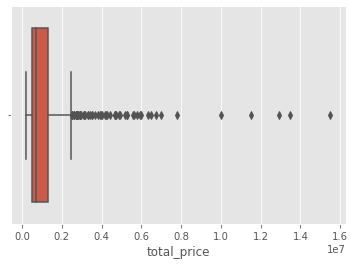

In [147]:
sns.boxplot(camden_merge['total_price'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of total price')

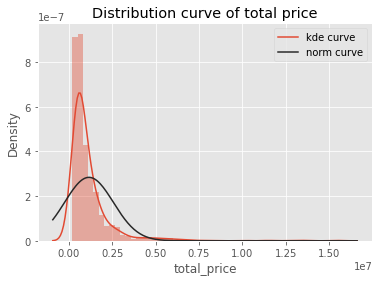

In [148]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['total_price'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of total price")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='unit_price'>

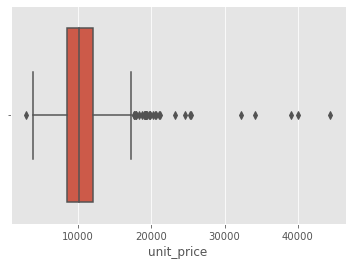

In [149]:
sns.boxplot(camden_merge['unit_price'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of unit price')

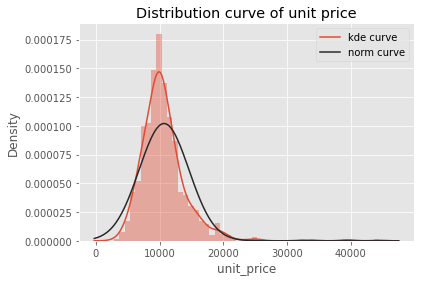

In [150]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['unit_price'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of unit price")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='floor_area'>

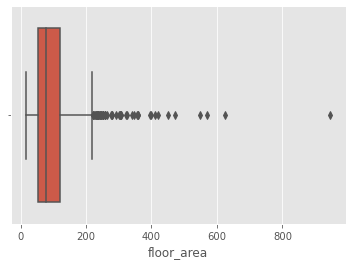

In [151]:
sns.boxplot(camden_merge['floor_area'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of floor area')

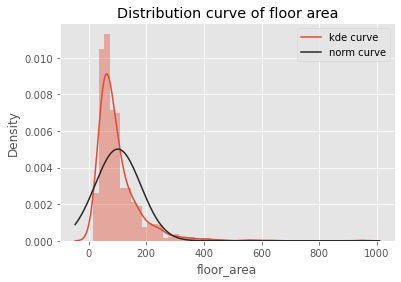

In [152]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['floor_area'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of floor area")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='room_number'>

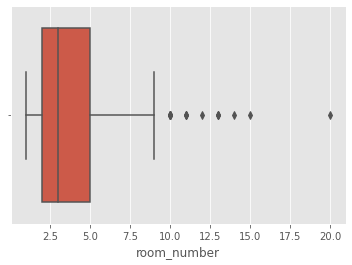

In [153]:
sns.boxplot(camden_merge['room_number'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of room number')

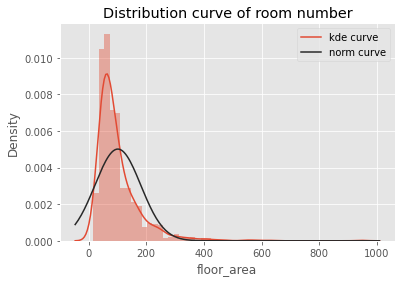

In [154]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['floor_area'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of room number")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population_density'>

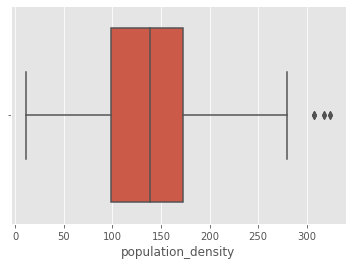

In [155]:
sns.boxplot(camden_merge['population_density'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of population density')

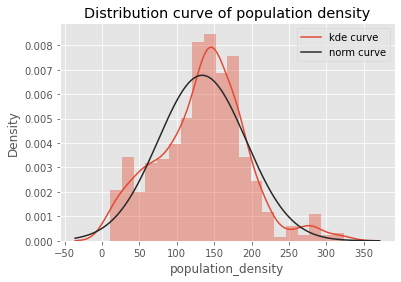

In [156]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['population_density'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of population density")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num_of_household_with_children'>

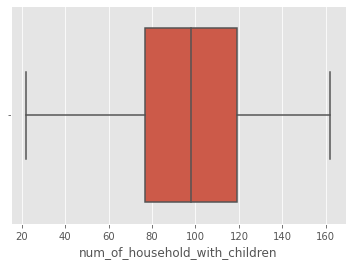

In [157]:
sns.boxplot(camden_merge['num_of_household_with_children'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'number of household with childeren'")

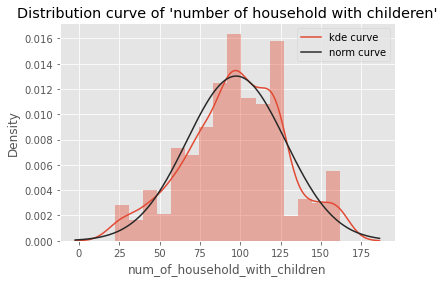

In [158]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['num_of_household_with_children'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'number of household with childeren'")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='employment_rate'>

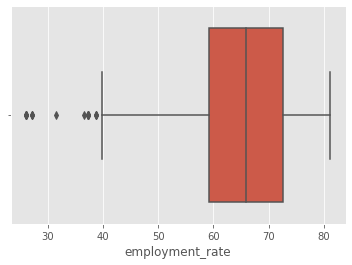

In [159]:
sns.boxplot(camden_merge['employment_rate'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of employment rate')

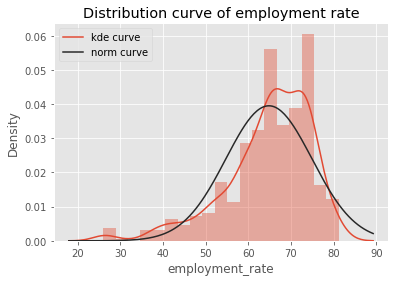

In [160]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['employment_rate'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of employment rate")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num_of_no_qualification'>

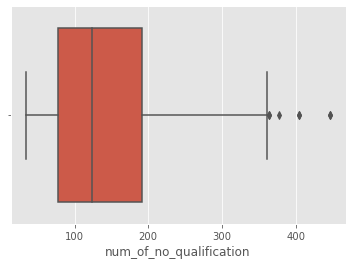

In [161]:
sns.boxplot(camden_merge['num_of_no_qualification'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of no qualifications')

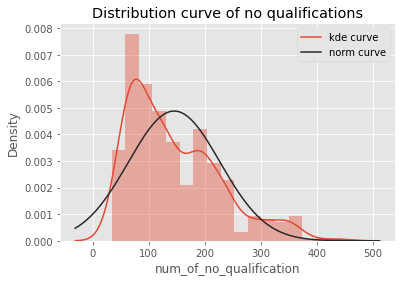

In [162]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['num_of_no_qualification'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of no qualifications")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='car_per_household'>

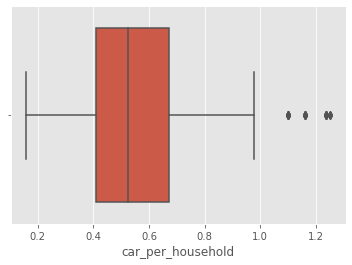

In [163]:
sns.boxplot(camden_merge['car_per_household'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'car_per_household'")

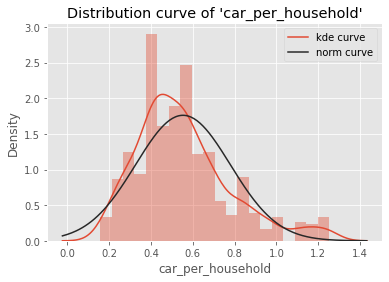

In [164]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['car_per_household'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'car_per_household'")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='social_rented_tenure_per_household'>

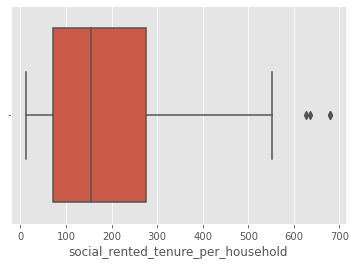

In [165]:
sns.boxplot(camden_merge['social_rented_tenure_per_household'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'social rented tenure per household'")

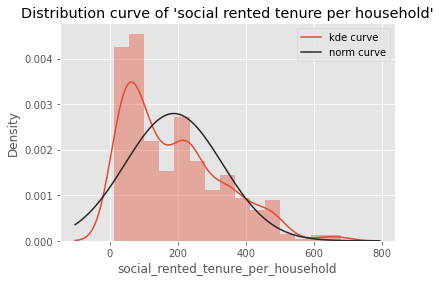

In [166]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(camden_merge['social_rented_tenure_per_household'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'social rented tenure per household'")

In [167]:
#check normality of variables 
n1 = stats.anderson(camden_merge['unit_price'], dist='norm')
n2 = stats.anderson(camden_merge['total_price'], dist='norm')
n3 = stats.anderson(camden_merge['floor_area'], dist='norm')
n4 = stats.anderson(camden_merge['room_number'], dist='norm')
n5 = stats.anderson(camden_merge['population_density'], dist='norm')
n6 = stats.anderson(camden_merge['num_of_household_with_children'], dist='norm')
n7 = stats.anderson(camden_merge['employment_rate'], dist='norm')
n8 = stats.anderson(camden_merge['num_of_no_qualification'], dist='norm')
n9 = stats.anderson(camden_merge['car_per_household'], dist='norm')
n10 = stats.anderson(camden_merge['social_rented_tenure_per_household'], dist='norm')

print(f"The aderson darling result for 'unit price' is {n1}")
print(f"The aderson darling result for 'total price' is {n2}")
print(f"The aderson darling result for 'floor area' is {n3}")
print(f"The aderson darling result for 'room number' is {n4}")
print(f"The aderson darling result for 'population density' is {n5}")
print(f"The aderson darling result for 'num_of_household_with_children' is {n6}")
print(f"The aderson darling result for 'employment rate' is {n7}")
print(f"The aderson darling result for 'num_of_no_qualification' is {n8}")
print(f"The aderson darling result for 'car_per_household' is {n9}")
print(f"The aderson darling result for 'social_rented_tenure_per_household' is {n10}")


The aderson darling result for 'unit price' is AndersonResult(statistic=22.052203850142973, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'total price' is AndersonResult(statistic=92.16180465689524, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'floor area' is AndersonResult(statistic=50.60896241989758, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'room number' is AndersonResult(statistic=31.670771946300874, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'population density' is AndersonResult(statistic=4.1428149846439055, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), 

In [168]:
camden_merge.columns

Index(['total_price', 'unit_price', 'old_new', 'property_type', 'floor_area',
       'room_number', 'local_authority', 'region', 'lsoa_code', 'msoa_code',
       'date', 'Names', 'population_density', 'num_of_household_with_children',
       'employment_rate', 'num_of_no_qualification', 'car_per_household',
       'social_rented_tenure_per_household'],
      dtype='object')

In [169]:
camden_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
0,415000,"8,321.6363",N,F,49.8700,2,Camden,London,E01000974,E02000178,2019-09-04,Camden 013E,156.0976,64,63.6000,230,0.4093,294
1,1172500,"9,770.8333",N,T,120.0000,4,Camden,London,E01000900,E02000177,2019-09-20,Camden 012A,187.8270,96,61.6000,282,0.4161,325
2,2205000,"17,093.0233",N,D,129.0000,4,Camden,London,E01000913,E02000166,2019-07-09,Camden 001E,10.9833,139,71.8000,70,1.2368,14
3,3300000,"13,043.4783",N,T,253.0000,8,Camden,London,E01000849,E02000176,2019-02-14,Camden 011D,216.3449,86,74.8000,76,0.4200,63
4,769595,"8,275.2151",N,F,93.0000,4,Camden,London,E01000904,E02000177,2019-01-31,Camden 012C,190.5579,100,58.4000,315,0.3878,478


In [170]:
corr_data = camden_merge.drop(['old_new','property_type','local_authority','region','lsoa_code','msoa_code','date','Names'],axis=1)

In [171]:
corr_data.head()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
0,415000,"8,321.6363",49.8700,2,156.0976,64,63.6000,230,0.4093,294
1,1172500,"9,770.8333",120.0000,4,187.8270,96,61.6000,282,0.4161,325
2,2205000,"17,093.0233",129.0000,4,10.9833,139,71.8000,70,1.2368,14
3,3300000,"13,043.4783",253.0000,8,216.3449,86,74.8000,76,0.4200,63
4,769595,"8,275.2151",93.0000,4,190.5579,100,58.4000,315,0.3878,478


In [172]:
corr_data.corr()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
total_price,1.0000,0.6143,0.8604,0.7416,-0.2829,0.2190,0.0842,-0.2099,0.3677,-0.2399
unit_price,0.6143,1.0000,0.2726,0.2465,-0.3267,0.0873,0.0784,-0.2883,0.2456,-0.2462
floor_area,0.8604,0.2726,1.0000,0.8749,-0.2190,0.2691,0.0957,-0.2067,0.3978,-0.2550
room_number,0.7416,0.2465,0.8749,1.0000,-0.1584,0.2755,0.0975,-0.1667,0.3523,-0.2175
population_density,-0.2829,-0.3267,-0.2190,-0.1584,1.0000,-0.2194,-0.0818,0.3131,-0.5325,0.3579
num_of_household_with_children,0.2190,0.0873,0.2691,0.2755,-0.2194,1.0000,0.3919,-0.2207,0.7130,-0.3582
employment_rate,0.0842,0.0784,0.0957,0.0975,-0.0818,0.3919,1.0000,-0.5658,0.4181,-0.5707
num_of_no_qualification,-0.2099,-0.2883,-0.2067,-0.1667,0.3131,-0.2207,-0.5658,1.0000,-0.5289,0.9015
car_per_household,0.3677,0.2456,0.3978,0.3523,-0.5325,0.7130,0.4181,-0.5289,1.0000,-0.6532
social_rented_tenure_per_household,-0.2399,-0.2462,-0.2550,-0.2175,0.3579,-0.3582,-0.5707,0.9015,-0.6532,1.0000


Text(0.5, 1.0, 'Correlation Matrix of house price in Camden')

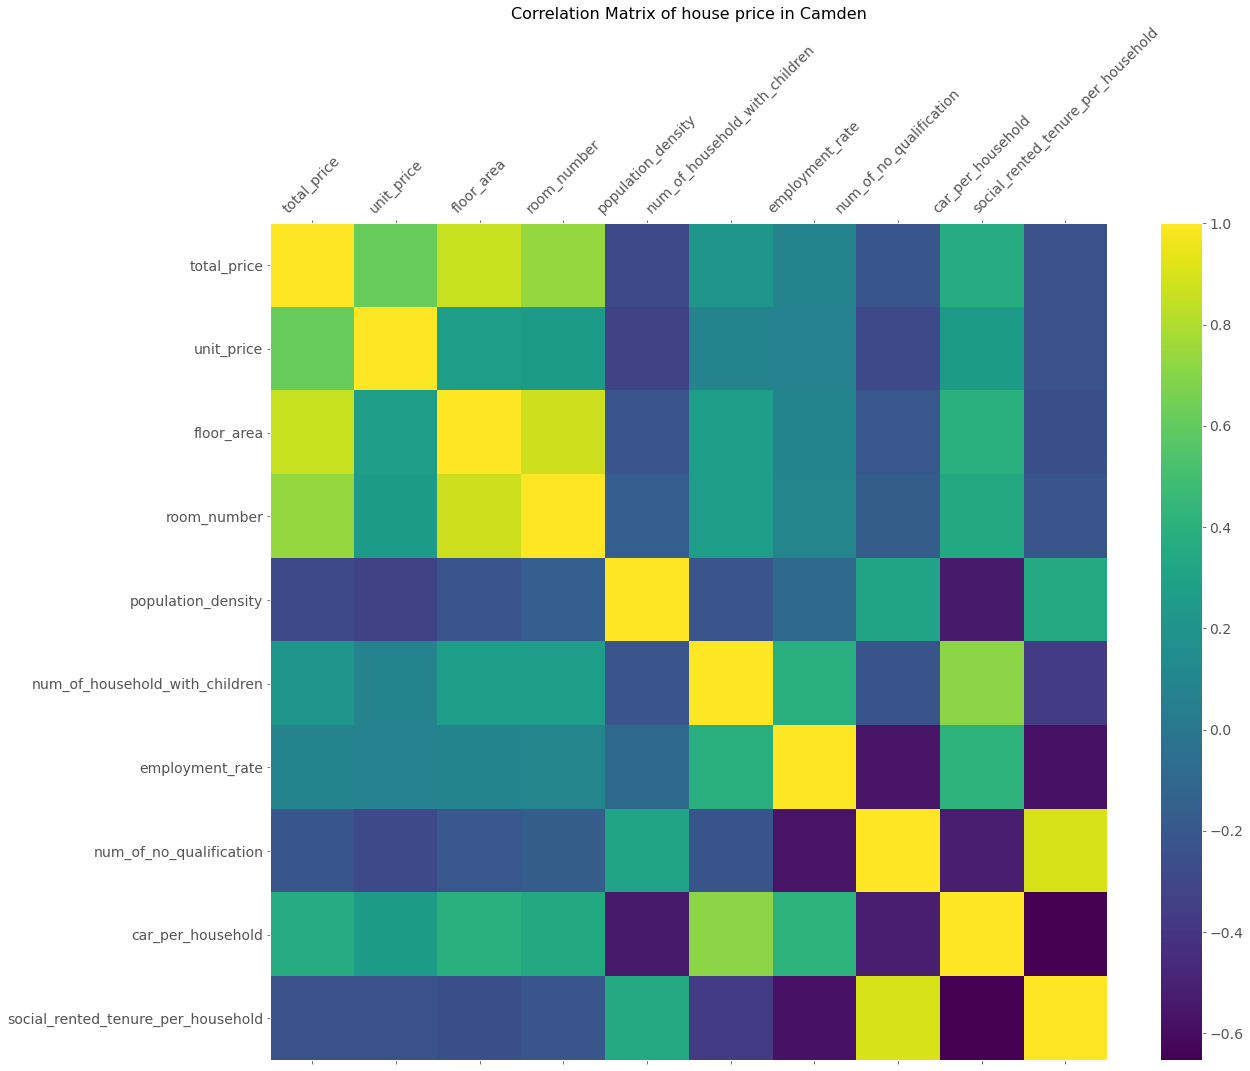

In [173]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_data.corr(), fignum=f.number)
plt.xticks(range(corr_data.shape[1]), corr_data.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_data.shape[1]), corr_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of house price in Camden', fontsize=16)

### Bristol 

In [174]:
bristol_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,132500,"2,880.4348",N,F,46.0000,2,"Bristol, City of",South West,E01014707,E02003060,2019-09-20,Bristol 049F,45.7184,35,207,164,1591,45
1,803000,"4,779.7619",N,T,168.0000,10,"Bristol, City of",South West,E01014616,E02003017,2019-07-12,Bristol 006A,40.1213,9,137,36,1475,52
2,215000,"2,654.3210",N,T,81.0000,5,"Bristol, City of",South West,E01032515,E02003064,2019-01-24,Bristol 053F,12.9105,72,152,246,1371,201
3,174000,"3,163.6364",N,F,55.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-02-14,Bristol 033A,29.2063,24,178,107,1413,29
4,352000,"3,485.1485",N,T,101.0000,4,"Bristol, City of",South West,E01033364,E02003050,2019-02-28,Bristol 039H,101.8313,30,143,92,1557,103


In [175]:
bristol_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733 entries, 0 to 3732
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   total_price                         3733 non-null   int64         
 1   unit_price                          3733 non-null   float64       
 2   old_new                             3733 non-null   object        
 3   property_type                       3733 non-null   object        
 4   floor_area                          3733 non-null   float64       
 5   room_number                         3733 non-null   int64         
 6   local_authority                     3733 non-null   object        
 7   region                              3733 non-null   object        
 8   lsoa_code                           3733 non-null   object        
 9   msoa_code                           3733 non-null   object        
 10  date                    

In [176]:
bristol_merge.isna().sum()

total_price                           0
unit_price                            0
old_new                               0
property_type                         0
floor_area                            0
room_number                           0
local_authority                       0
region                                0
lsoa_code                             0
msoa_code                             0
date                                  0
Names                                 0
population_density                    0
num_of_household_with_children        0
employment_num                        0
num_of_no_qualification               0
no_car_avalibility                    0
social_rented_tenure_per_household    0
dtype: int64

In [177]:
bristol_merge.columns

Index(['total_price', 'unit_price', 'old_new', 'property_type', 'floor_area',
       'room_number', 'local_authority', 'region', 'lsoa_code', 'msoa_code',
       'date', 'Names', 'population_density', 'num_of_household_with_children',
       'employment_num', 'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household'],
      dtype='object')

In [178]:
bristol_merge.describe()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
count,"3,733.0000","3,733.0000","3,733.0000","3,733.0000","3,733.0000","3,733.0000","3,733.0000","3,733.0000","3,733.0000","3,733.0000"
mean,"323,478.5052","3,475.0898",92.8005,4.5151,60.9984,53.7150,171.4650,140.0059,"1,619.6472",117.6539
std,"181,762.4026","1,051.8915",37.2771,1.5021,33.7061,34.1975,40.6970,82.7998,266.3820,112.4134
min,"54,750.0000",730.0000,18.0000,1.0000,1.9511,4.0000,39.0000,11.0000,998.0000,2.0000
25%,"220,000.0000","2,764.2857",73.0000,4.0000,36.6564,29.0000,151.0000,81.0000,"1,449.0000",33.0000
50%,"272,000.0000","3,296.2963",86.0000,5.0000,53.8689,47.0000,173.0000,132.0000,"1,582.0000",80.0000
75%,"365,000.0000","4,025.5831",105.0000,5.0000,77.4466,71.0000,198.0000,197.0000,"1,759.0000",174.0000
max,"1,800,000.0000","18,534.3599",376.0000,14.0000,182.8856,242.0000,264.0000,456.0000,"2,572.0000",674.0000


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_price'>

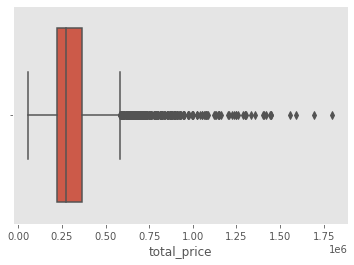

In [179]:
sns.boxplot(bristol_merge['total_price'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of total price')

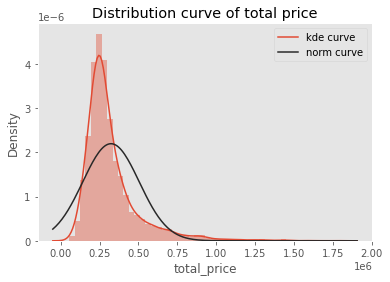

In [180]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['total_price'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of total price")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='unit_price'>

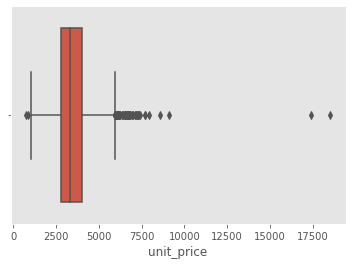

In [181]:
sns.boxplot(bristol_merge['unit_price'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of unit price')

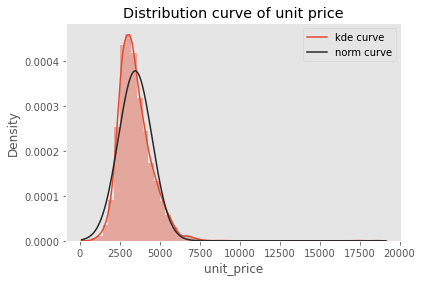

In [182]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['unit_price'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of unit price")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='floor_area'>

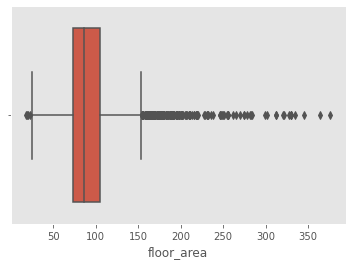

In [183]:
sns.boxplot(bristol_merge['floor_area'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of floor area')

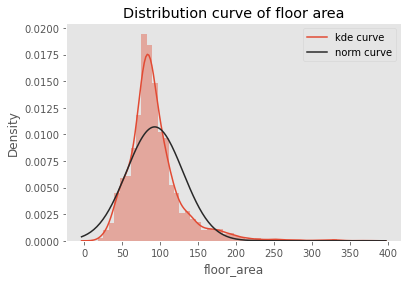

In [184]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['floor_area'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of floor area")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population_density'>

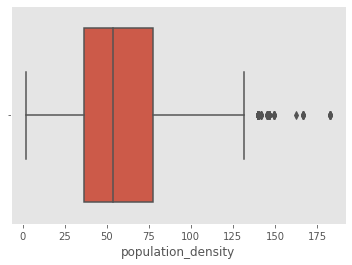

In [185]:
sns.boxplot(bristol_merge['population_density'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of population density')

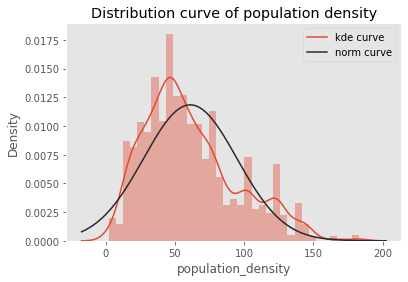

In [186]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['population_density'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of population density")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num_of_household_with_children'>

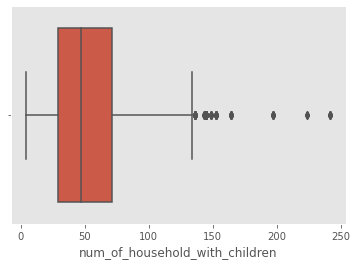

In [187]:
sns.boxplot(bristol_merge['num_of_household_with_children'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'number of household with children'")

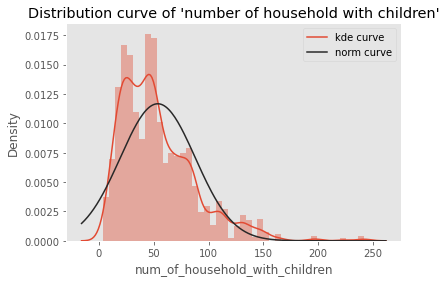

In [188]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['num_of_household_with_children'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'number of household with children'")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='employment_num'>

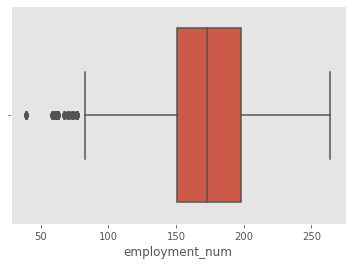

In [189]:
sns.boxplot(bristol_merge['employment_num'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of employment number')

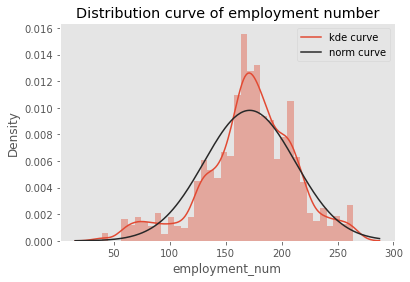

In [190]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['employment_num'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of employment number")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num_of_no_qualification'>

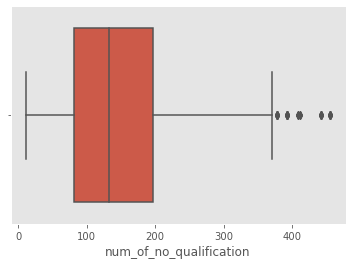

In [191]:
sns.boxplot(bristol_merge['num_of_no_qualification'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'number of people with no qualifications'")

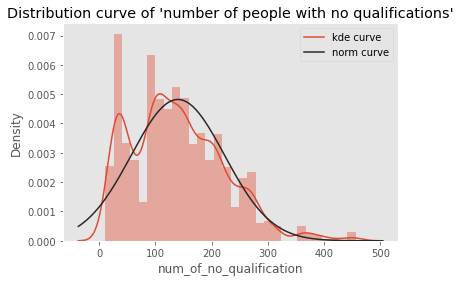

In [192]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['num_of_no_qualification'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'number of people with no qualifications'")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='no_car_avalibility'>

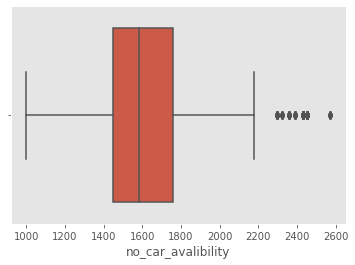

In [193]:
sns.boxplot(bristol_merge['no_car_avalibility'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of total price')

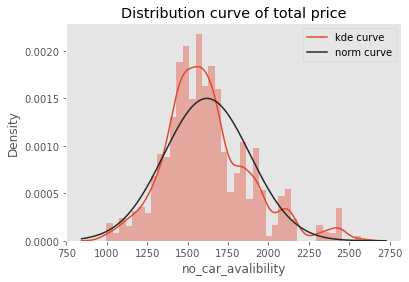

In [194]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['no_car_avalibility'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of total price")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='social_rented_tenure_per_household'>

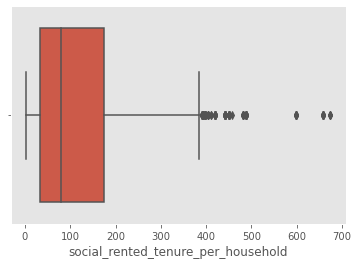

In [195]:
sns.boxplot(bristol_merge['social_rented_tenure_per_household'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'social rented tenure per household'")

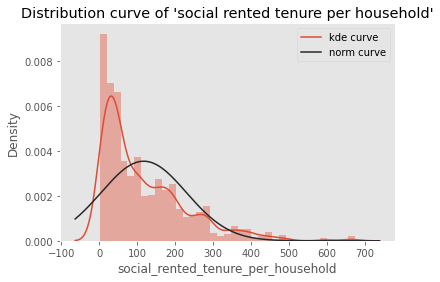

In [196]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(bristol_merge['social_rented_tenure_per_household'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'social rented tenure per household'")

In [197]:
#check normality of variables 
bn1 = stats.anderson(bristol_merge['unit_price'], dist='norm')
bn2 = stats.anderson(bristol_merge['total_price'], dist='norm')
bn3 = stats.anderson(bristol_merge['floor_area'], dist='norm')
bn4 = stats.anderson(bristol_merge['room_number'], dist='norm')
bn5 = stats.anderson(bristol_merge['population_density'], dist='norm')
bn6 = stats.anderson(bristol_merge['num_of_household_with_children'], dist='norm')
bn7 = stats.anderson(bristol_merge['employment_num'], dist='norm')
bn8 = stats.anderson(bristol_merge['num_of_no_qualification'], dist='norm')
bn9 = stats.anderson(bristol_merge['no_car_avalibility'], dist='norm')
bn10 = stats.anderson(bristol_merge['social_rented_tenure_per_household'], dist='norm')

print(f"The aderson darling result for 'unit price' is {bn1}")
print(f"The aderson darling result for 'total price' is {bn2}")
print(f"The aderson darling result for 'floor area' is {bn3}")
print(f"The aderson darling result for 'room number' is {bn4}")
print(f"The aderson darling result for 'population density' is {n5}")
print(f"The aderson darling result for 'num_of_household_with_children' is {bn6}")
print(f"The aderson darling result for 'employment rate' is {bn7}")
print(f"The aderson darling result for 'num_of_no_qualification' is {bn8}")
print(f"The aderson darling result for 'car_per_household' is {bn9}")
print(f"The aderson darling result for 'social_rented_tenure_per_household' is {bn10}")

The aderson darling result for 'unit price' is AndersonResult(statistic=44.43821878131348, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'total price' is AndersonResult(statistic=227.84181373673346, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'floor area' is AndersonResult(statistic=114.25948020471606, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'room number' is AndersonResult(statistic=91.35178291274133, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'population density' is AndersonResult(statistic=4.1428149846439055, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), 

In [198]:
corr_data_bristol = bristol_merge.drop(['old_new','property_type','local_authority','region','lsoa_code','msoa_code','date','Names'],axis=1)


In [199]:
corr_data_bristol.head()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,132500,"2,880.4348",46.0000,2,45.7184,35,207,164,1591,45
1,803000,"4,779.7619",168.0000,10,40.1213,9,137,36,1475,52
2,215000,"2,654.3210",81.0000,5,12.9105,72,152,246,1371,201
3,174000,"3,163.6364",55.0000,3,29.2063,24,178,107,1413,29
4,352000,"3,485.1485",101.0000,4,101.8313,30,143,92,1557,103


In [200]:
corr_data_bristol.corr()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
total_price,1.0000,0.5413,0.8236,0.6531,0.1275,-0.3784,-0.1983,-0.4910,-0.0658,-0.3106
unit_price,0.5413,1.0000,0.0252,-0.0250,0.2224,-0.4040,-0.3024,-0.5487,-0.0293,-0.2874
floor_area,0.8236,0.0252,1.0000,0.8246,0.0341,-0.2151,-0.0354,-0.2618,-0.0442,-0.2109
room_number,0.6531,-0.0250,0.8246,1.0000,-0.0506,-0.1194,0.1121,-0.1157,-0.0441,-0.1528
population_density,0.1275,0.2224,0.0341,-0.0506,1.0000,0.0269,-0.0500,-0.1870,0.2914,-0.0540
num_of_household_with_children,-0.3784,-0.4040,-0.2151,-0.1194,0.0269,1.0000,0.4617,0.8245,0.5136,0.7560
employment_num,-0.1983,-0.3024,-0.0354,0.1121,-0.0500,0.4617,1.0000,0.4253,0.5761,0.1005
num_of_no_qualification,-0.4910,-0.5487,-0.2618,-0.1157,-0.1870,0.8245,0.4253,1.0000,0.2926,0.7445
no_car_avalibility,-0.0658,-0.0293,-0.0442,-0.0441,0.2914,0.5136,0.5761,0.2926,1.0000,0.2391
social_rented_tenure_per_household,-0.3106,-0.2874,-0.2109,-0.1528,-0.0540,0.7560,0.1005,0.7445,0.2391,1.0000


Text(0.5, 1.0, 'Correlation Matrix of house price in Bristol')

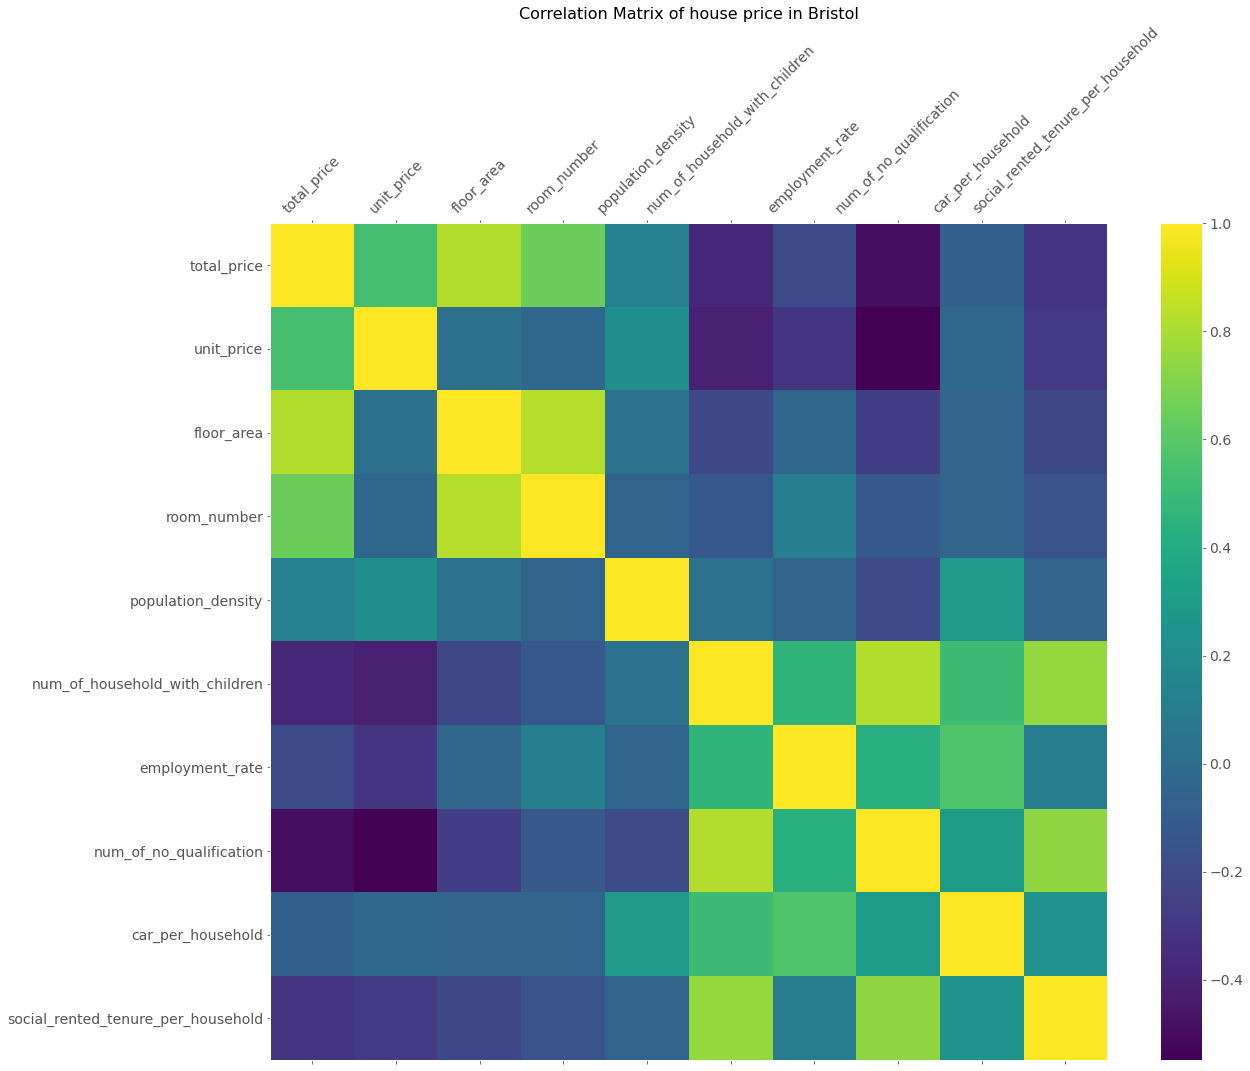

In [201]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_data_bristol.corr(), fignum=f.number)
plt.xticks(range(corr_data_bristol.shape[1]), corr_data.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_data_bristol.shape[1]), corr_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of house price in Bristol', fontsize=16)

### Birmingham 

In [202]:
birmingham_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,185000,"2,010.8696",N,S,92.0000,5,Birmingham,West Midlands,E01008949,E02001948,2019-01-18,Birmingham 122E,64.8510,34,128,95,1262,6
1,140000,"2,187.5000",N,T,64.0000,3,Birmingham,West Midlands,E01009228,E02001839,2019-01-07,Birmingham 013D,68.0772,69,170,183,1657,27
2,310000,"2,924.5283",N,T,106.0000,4,Birmingham,West Midlands,E01009068,E02001901,2019-03-15,Birmingham 075C,70.7149,29,112,47,1543,76
3,202500,"2,596.1538",N,S,78.0000,4,Birmingham,West Midlands,E01009455,E02001831,2019-06-14,Birmingham 005F,64.5366,57,134,183,1322,373
4,125000,"1,524.3902",N,T,82.0000,5,Birmingham,West Midlands,E01009103,E02001855,2019-01-04,Birmingham 029E,58.1158,116,149,310,1536,433


In [203]:
birmingham_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7431 entries, 0 to 7430
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   total_price                         7431 non-null   int64         
 1   unit_price                          7431 non-null   float64       
 2   old_new                             7431 non-null   object        
 3   property_type                       7431 non-null   object        
 4   floor_area                          7431 non-null   float64       
 5   room_number                         7431 non-null   int64         
 6   local_authority                     7431 non-null   object        
 7   region                              7431 non-null   object        
 8   lsoa_code                           7431 non-null   object        
 9   msoa_code                           7431 non-null   object        
 10  date                    

In [204]:
birmingham_merge.isna().sum()

total_price                           0
unit_price                            0
old_new                               0
property_type                         0
floor_area                            0
room_number                           0
local_authority                       0
region                                0
lsoa_code                             0
msoa_code                             0
date                                  0
Names                                 0
population_density                    0
num_of_household_with_children        0
employment_num                        0
num_of_no_qualification               0
no_car_avalibility                    0
social_rented_tenure_per_household    0
dtype: int64

In [205]:
birmingham_merge.columns

Index(['total_price', 'unit_price', 'old_new', 'property_type', 'floor_area',
       'room_number', 'local_authority', 'region', 'lsoa_code', 'msoa_code',
       'date', 'Names', 'population_density', 'num_of_household_with_children',
       'employment_num', 'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household'],
      dtype='object')

In [206]:
birmingham_merge.describe()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
count,"7,431.0000","7,431.0000","7,431.0000","7,431.0000","7,431.0000","7,431.0000","7,431.0000","7,431.0000","7,431.0000","7,431.0000"
mean,"210,209.3095","2,357.2429",88.2992,4.5905,52.6220,60.2720,155.4282,198.1059,"1,637.1775",126.9377
std,"138,767.3065",804.0845,35.9608,1.4103,28.4057,32.3854,34.4811,104.3252,302.4935,113.5053
min,"41,250.0000",292.5532,22.0000,1.0000,1.8710,1.0000,22.0000,24.0000,984.0000,2.0000
25%,"138,250.0000","1,797.5437",70.0000,4.0000,35.9163,36.0000,138.0000,118.0000,"1,484.0000",35.0000
50%,"175,000.0000","2,252.4272",81.0000,5.0000,49.4004,56.0000,156.0000,180.0000,"1,590.0000",98.0000
75%,"240,000.0000","2,806.5700",97.0000,5.0000,63.7620,80.0000,170.0000,267.0000,"1,704.0000",192.0000
max,"4,725,000.0000","8,285.4618",601.0000,15.0000,221.7129,274.0000,312.0000,731.0000,"3,385.0000",966.0000


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_price'>

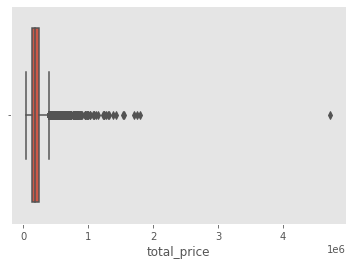

In [207]:
sns.boxplot(birmingham_merge['total_price'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of total price')

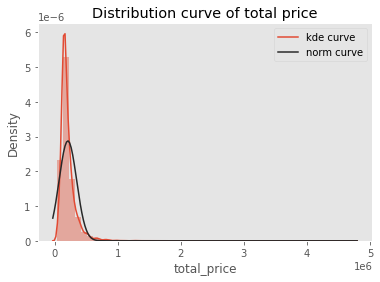

In [208]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['total_price'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of total price")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='unit_price'>

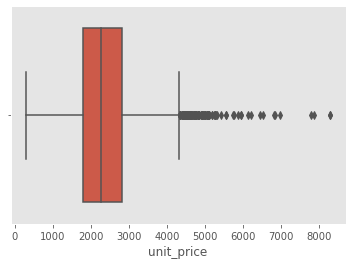

In [209]:
sns.boxplot(birmingham_merge['unit_price'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of unit price')

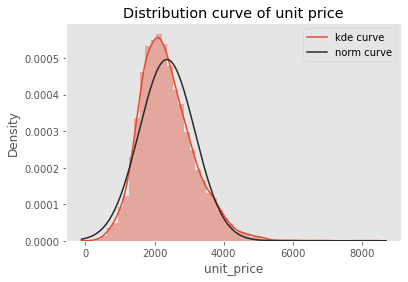

In [210]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['unit_price'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of unit price")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='floor_area'>

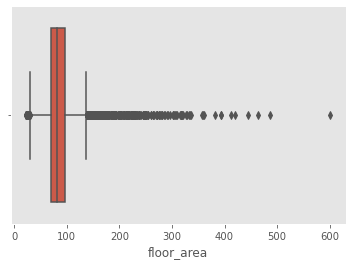

In [211]:
sns.boxplot(birmingham_merge['floor_area'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of floor area')

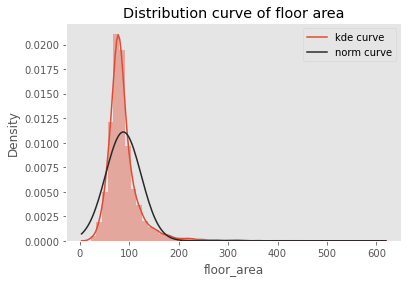

In [212]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['floor_area'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of floor area")


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='population_density'>

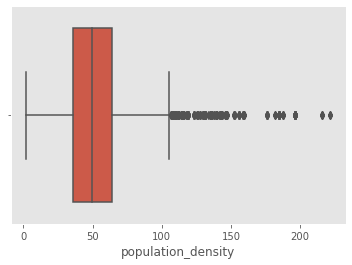

In [213]:
sns.boxplot(birmingham_merge['population_density'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of population density')

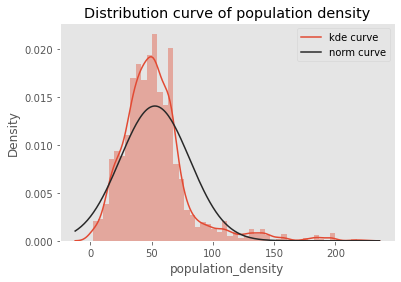

In [214]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['population_density'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of population density")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num_of_household_with_children'>

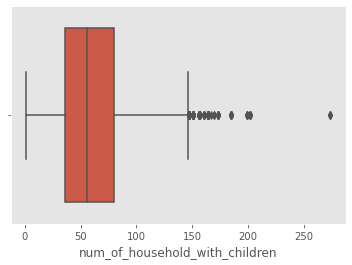

In [215]:
sns.boxplot(birmingham_merge['num_of_household_with_children'])


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'number of household with children'")

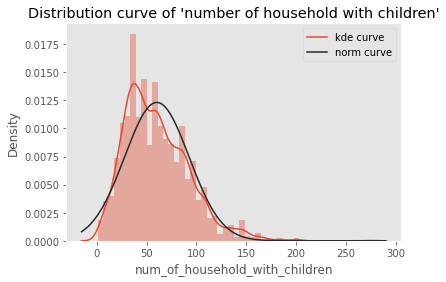

In [216]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['num_of_household_with_children'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'number of household with children'")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='employment_num'>

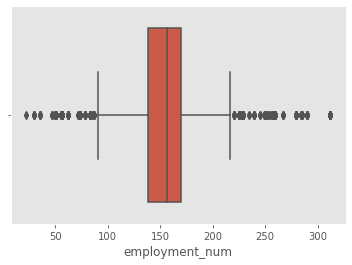

In [217]:
sns.boxplot(birmingham_merge['employment_num'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of employment number')

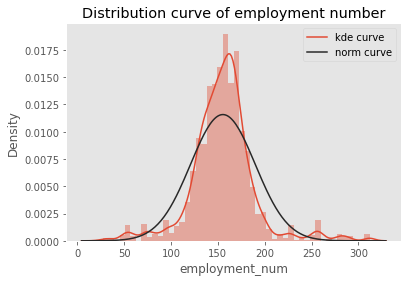

In [218]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['employment_num'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of employment number")

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num_of_no_qualification'>

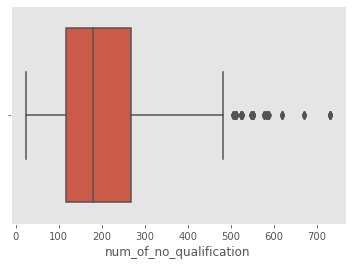

In [219]:
sns.boxplot(birmingham_merge['num_of_no_qualification'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'number of people with no qualifications'")

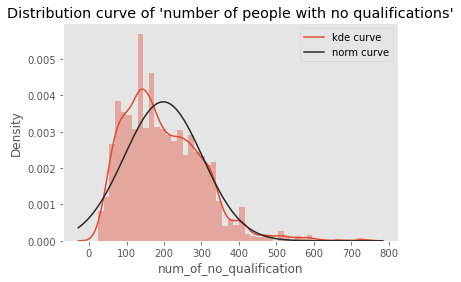

In [220]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['num_of_no_qualification'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'number of people with no qualifications'")


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='no_car_avalibility'>

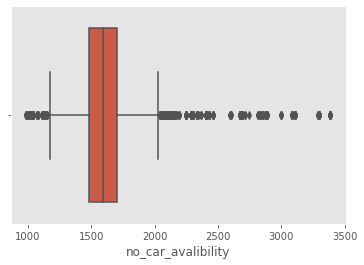

In [221]:
sns.boxplot(birmingham_merge['no_car_avalibility'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution curve of total price')

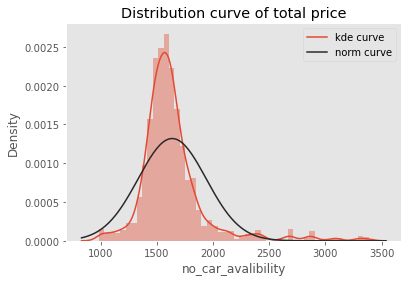

In [222]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['no_car_avalibility'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of total price")


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='social_rented_tenure_per_household'>

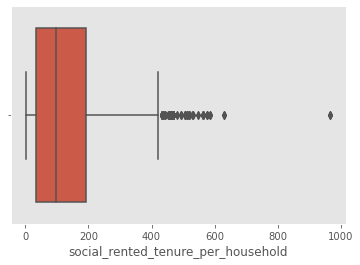

In [223]:
sns.boxplot(birmingham_merge['social_rented_tenure_per_household'])

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution curve of 'social rented tenure per household'")

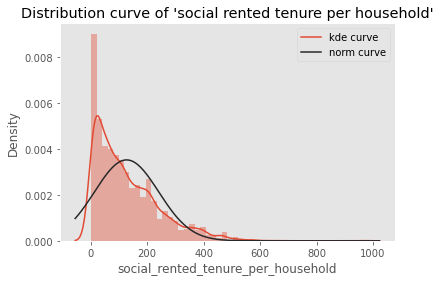

In [224]:
fig = plt.figure(figsize=(6,4))
sns_plot = sns.distplot(birmingham_merge['social_rented_tenure_per_household'], fit=norm, kde=True)
plt.legend(labels=['kde curve', 'norm curve'])
plt.title("Distribution curve of 'social rented tenure per household'")

In [225]:
#check normality of variables 
bn1 = stats.anderson(birmingham_merge['unit_price'], dist='norm')
bn2 = stats.anderson(birmingham_merge['total_price'], dist='norm')
bn3 = stats.anderson(birmingham_merge['floor_area'], dist='norm')
bn4 = stats.anderson(birmingham_merge['room_number'], dist='norm')
bn5 = stats.anderson(birmingham_merge['population_density'], dist='norm')
bn6 = stats.anderson(birmingham_merge['num_of_household_with_children'], dist='norm')
bn7 = stats.anderson(birmingham_merge['employment_num'], dist='norm')
bn8 = stats.anderson(birmingham_merge['num_of_no_qualification'], dist='norm')
bn9 = stats.anderson(birmingham_merge['no_car_avalibility'], dist='norm')
bn10 = stats.anderson(birmingham_merge['social_rented_tenure_per_household'], dist='norm')

In [226]:
print(f"The aderson darling result for 'unit price' is {bn1}")
print(f"The aderson darling result for 'total price' is {bn2}")
print(f"The aderson darling result for 'floor area' is {bn3}")
print(f"The aderson darling result for 'room number' is {bn4}")
print(f"The aderson darling result for 'population density' is {n5}")
print(f"The aderson darling result for 'num_of_household_with_children' is {bn6}")
print(f"The aderson darling result for 'employment rate' is {bn7}")
print(f"The aderson darling result for 'num_of_no_qualification' is {bn8}")
print(f"The aderson darling result for 'car_per_household' is {bn9}")
print(f"The aderson darling result for 'social_rented_tenure_per_household' is {bn10}")

The aderson darling result for 'unit price' is AndersonResult(statistic=52.154912640236034, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'total price' is AndersonResult(statistic=494.6082453642821, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'floor area' is AndersonResult(statistic=382.11104126256396, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'room number' is AndersonResult(statistic=223.5992509855414, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
The aderson darling result for 'population density' is AndersonResult(statistic=4.1428149846439055, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), 

In [227]:
corr_data_birmingham = birmingham_merge.drop(['old_new','property_type','local_authority','region','lsoa_code','msoa_code','date','Names'],axis=1)

In [228]:
corr_data_birmingham.head()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,185000,"2,010.8696",92.0000,5,64.8510,34,128,95,1262,6
1,140000,"2,187.5000",64.0000,3,68.0772,69,170,183,1657,27
2,310000,"2,924.5283",106.0000,4,70.7149,29,112,47,1543,76
3,202500,"2,596.1538",78.0000,4,64.5366,57,134,183,1322,373
4,125000,"1,524.3902",82.0000,5,58.1158,116,149,310,1536,433


In [229]:
corr_data_birmingham.corr()

,total_price,unit_price,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
total_price,1.0000,0.6125,0.7537,0.6019,-0.2158,-0.3672,-0.0698,-0.4028,-0.0779,-0.2588
unit_price,0.6125,1.0000,0.0715,0.1019,-0.2372,-0.4639,-0.1648,-0.5889,-0.1873,-0.3281
floor_area,0.7537,0.0715,1.0000,0.7839,-0.0715,-0.1772,0.0203,-0.1070,0.0381,-0.1239
room_number,0.6019,0.1019,0.7839,1.0000,-0.0695,-0.1034,0.1295,-0.0304,0.0871,-0.1370
population_density,-0.2158,-0.2372,-0.0715,-0.0695,1.0000,0.0699,-0.0523,0.3275,0.1588,0.0242
num_of_household_with_children,-0.3672,-0.4639,-0.1772,-0.1034,0.0699,1.0000,0.3759,0.6895,0.3755,0.7374
employment_num,-0.0698,-0.1648,0.0203,0.1295,-0.0523,0.3759,1.0000,0.3966,0.7223,0.0404
num_of_no_qualification,-0.4028,-0.5889,-0.1070,-0.0304,0.3275,0.6895,0.3966,1.0000,0.5609,0.5852
no_car_avalibility,-0.0779,-0.1873,0.0381,0.0871,0.1588,0.3755,0.7223,0.5609,1.0000,0.1724
social_rented_tenure_per_household,-0.2588,-0.3281,-0.1239,-0.1370,0.0242,0.7374,0.0404,0.5852,0.1724,1.0000


Text(0.5, 1.0, 'Correlation Matrix of house price in birmingham')

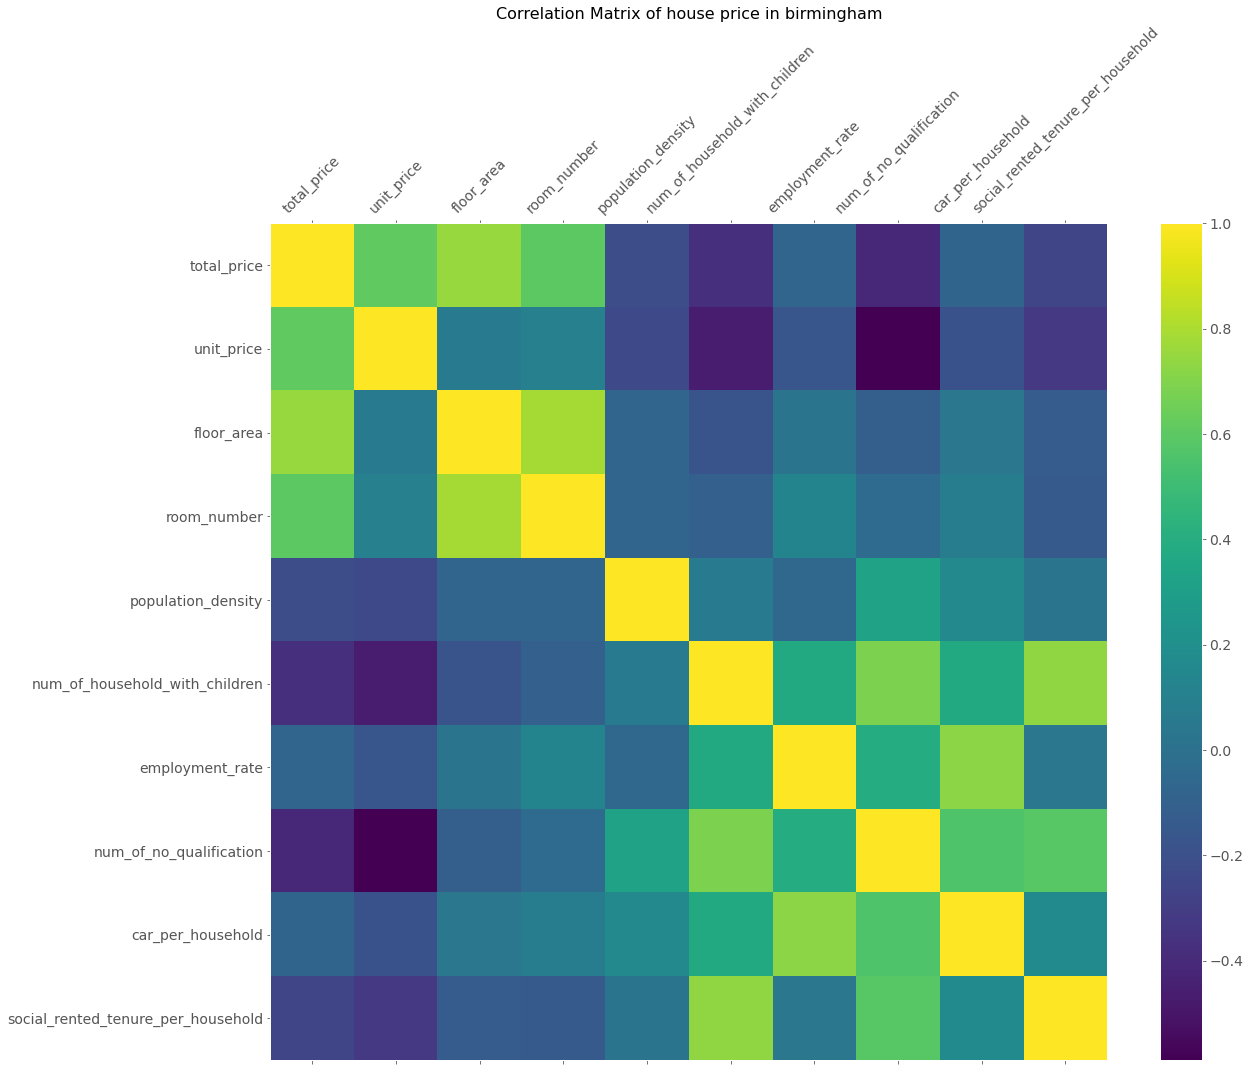

In [230]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_data_birmingham.corr(), fignum=f.number)
plt.xticks(range(corr_data_birmingham.shape[1]), corr_data.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_data_birmingham.shape[1]), corr_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of house price in birmingham', fontsize=16)

## We prepared the data for building machine learning models to predict house prices (unit price & total price) . 

### Camden 

In [231]:
#### Deal with multicollinearity

In [232]:
camden_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household
0,415000,"8,321.6363",N,F,49.8700,2,Camden,London,E01000974,E02000178,2019-09-04,Camden 013E,156.0976,64,63.6000,230,0.4093,294
1,1172500,"9,770.8333",N,T,120.0000,4,Camden,London,E01000900,E02000177,2019-09-20,Camden 012A,187.8270,96,61.6000,282,0.4161,325
2,2205000,"17,093.0233",N,D,129.0000,4,Camden,London,E01000913,E02000166,2019-07-09,Camden 001E,10.9833,139,71.8000,70,1.2368,14
3,3300000,"13,043.4783",N,T,253.0000,8,Camden,London,E01000849,E02000176,2019-02-14,Camden 011D,216.3449,86,74.8000,76,0.4200,63
4,769595,"8,275.2151",N,F,93.0000,4,Camden,London,E01000904,E02000177,2019-01-31,Camden 012C,190.5579,100,58.4000,315,0.3878,478


In [233]:
camden_merge.columns

Index(['total_price', 'unit_price', 'old_new', 'property_type', 'floor_area',
       'room_number', 'local_authority', 'region', 'lsoa_code', 'msoa_code',
       'date', 'Names', 'population_density', 'num_of_household_with_children',
       'employment_rate', 'num_of_no_qualification', 'car_per_household',
       'social_rented_tenure_per_household'],
      dtype='object')

In [234]:
##unit price prediction (linear regression)

In [235]:
# camden_merge_unit_regression_data = camden_merge.drop(["local_authority","region","lsoa_code","msoa_code","date","Names","total_price"],axis = 1)
# # camden_merge_unit_regression_data.old_new.unique()#all properties in camden are new properties 
# camden_merge_unit_regression_data = pd.get_dummies(camden_merge_unit_regression_data)#encoding of categrical variables



In [236]:
camden_merge_unit_regression_data = camden_merge.drop(["local_authority","region","lsoa_code","msoa_code","date","Names","total_price"],axis = 1)
camden_merge_unit_regression_data.old_new.unique()#all properties in camden are new p roperties 
camden_merge_unit_regression_data = pd.get_dummies(camden_merge_unit_regression_data)#encoding of categrical variables
camden_merge_unit_regression_data['local_authority'] = camden_merge['local_authority']
camden_merge_unit_regression_data['region'] = camden_merge['region']
camden_merge_unit_regression_data['lsoa_code'] = camden_merge['lsoa_code']
camden_merge_unit_regression_data.to_excel(os.path.join('code','camden_unit_regression.xlsx'),index = False)



In [237]:
camden_merge_unit_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   unit_price                          761 non-null    float64
 1   floor_area                          761 non-null    float64
 2   room_number                         761 non-null    int64  
 3   population_density                  761 non-null    float64
 4   num_of_household_with_children      761 non-null    int64  
 5   employment_rate                     761 non-null    float64
 6   num_of_no_qualification             761 non-null    int64  
 7   car_per_household                   761 non-null    float64
 8   social_rented_tenure_per_household  761 non-null    int64  
 9   old_new_N                           761 non-null    uint8  
 10  property_type_D                     761 non-null    uint8  
 11  property_type_F                     761 non-n

In [238]:
# camden_merge_unit_regression_data.to_excel(os.path.join('code','camden_unit_regression.xlsx'),index = False)

In [239]:
camden_merge_unit_regression_data.columns

Index(['unit_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_rate',
       'num_of_no_qualification', 'car_per_household',
       'social_rented_tenure_per_household', 'old_new_N', 'property_type_D',
       'property_type_F', 'property_type_S', 'property_type_T',
       'local_authority', 'region', 'lsoa_code'],
      dtype='object')

In [240]:
#a cateogircal variable of K categories or levels, usually enters a regression as a sequence of K-1 dummy variables.
#The level that is left out becomes the reference level, and this is important for interpreting the regression model.
#Here we manually choose the reference level for each categorical variable and exclude them from the DataFrame. 

#We chose the property_type_D as the referrence, so we delete it from the original dataframe.
#We deleted the old_new_N as all property are new properties in Camden.
camden_merge_unit_regression_data = camden_merge_unit_regression_data.drop(['old_new_N','property_type_D'],axis = 1)

In [241]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [242]:

camden_merge_unit_regression_data = camden_merge_unit_regression_data.drop(['local_authority','region','lsoa_code'],axis = 1)

In [243]:
#df_init = camden_merge_unit_regression_data[['floor_area','room_number','population_density','num_of_household_with_children','employment_rate','num_of_no_qualification','car_per_household','social_rented_tenure_per_household','old_new_N','property_type_D','property_type_F','property_type_S','property_type_T','unit_price']]
#df_init_new = drop_column_using_vif_(df_init.drop('unit_price', axis=1))
camden_merge_unit_regression_data_new = drop_column_using_vif_(camden_merge_unit_regression_data.drop('unit_price', axis=1))
#df_init.drop('unit_price', axis=1)
print(camden_merge_unit_regression_data_new.columns)




Dropping: property_type_F
Dropping: social_rented_tenure_per_household
Index(['floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_rate',
       'num_of_no_qualification', 'car_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


In [244]:
camden_merge_unit_regression_data_new.head()

,floor_area,room_number,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,property_type_S,property_type_T
0,49.8700,2,156.0976,64,63.6000,230,0.4093,0,0
1,120.0000,4,187.8270,96,61.6000,282,0.4161,0,1
2,129.0000,4,10.9833,139,71.8000,70,1.2368,0,0
3,253.0000,8,216.3449,86,74.8000,76,0.4200,0,1
4,93.0000,4,190.5579,100,58.4000,315,0.3878,0,0


In [245]:
camden_merge_unit_new_X = camden_merge_unit_regression_data_new
camden_merge_unit_new_y = camden_merge_unit_regression_data["unit_price"]

In [246]:
camden_merge_unit_new_X.head()

,floor_area,room_number,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,property_type_S,property_type_T
0,49.8700,2,156.0976,64,63.6000,230,0.4093,0,0
1,120.0000,4,187.8270,96,61.6000,282,0.4161,0,1
2,129.0000,4,10.9833,139,71.8000,70,1.2368,0,0
3,253.0000,8,216.3449,86,74.8000,76,0.4200,0,1
4,93.0000,4,190.5579,100,58.4000,315,0.3878,0,0


In [247]:
camden_merge_unit_new_y.head()

0                                 8,321.6363
1                                 9,770.8333
2                                17,093.0233
3                                13,043.4783
4                                 8,275.2151
Name: unit_price, dtype: float64

In [248]:
print(camden_merge_unit_new_X.shape)
print(camden_merge_unit_new_y.shape)
print(camden_merge_unit_new_X.columns)

(761, 9)
(761,)
Index(['floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_rate',
       'num_of_no_qualification', 'car_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


In [249]:
##total price prediction (linear regression)

In [250]:
camden_merge_total_regression_data = camden_merge.drop(["local_authority","region","lsoa_code","msoa_code","date","Names","unit_price"],axis = 1)
camden_merge_total_regression_data.old_new.unique()#all properties in camden are new p roperties 
camden_merge_total_regression_data = pd.get_dummies(camden_merge_total_regression_data)#encoding of categrical variables
camden_merge_total_regression_data['local_authority'] = camden_merge['local_authority']
camden_merge_total_regression_data['region'] = camden_merge['region']
camden_merge_total_regression_data['lsoa_code'] = camden_merge['lsoa_code']
camden_merge_total_regression_data.to_excel(os.path.join('code','camden_total_regression.xlsx'),index = False)

In [251]:
camden_merge_total_regression_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_price                         761 non-null    int64  
 1   floor_area                          761 non-null    float64
 2   room_number                         761 non-null    int64  
 3   population_density                  761 non-null    float64
 4   num_of_household_with_children      761 non-null    int64  
 5   employment_rate                     761 non-null    float64
 6   num_of_no_qualification             761 non-null    int64  
 7   car_per_household                   761 non-null    float64
 8   social_rented_tenure_per_household  761 non-null    int64  
 9   old_new_N                           761 non-null    uint8  
 10  property_type_D                     761 non-null    uint8  
 11  property_type_F                     761 non-n

In [252]:
# camden_merge_total_regression_data.to_excel(os.path.join('code','camden_total_regression.xlsx'),index = False)

In [253]:
camden_merge_total_regression_data.columns

Index(['total_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_rate',
       'num_of_no_qualification', 'car_per_household',
       'social_rented_tenure_per_household', 'old_new_N', 'property_type_D',
       'property_type_F', 'property_type_S', 'property_type_T',
       'local_authority', 'region', 'lsoa_code'],
      dtype='object')

In [254]:
#a cateogircal variable of K categories or levels, usually enters a regression as a sequence of K-1 dummy variables.
#The level that is left out becomes the reference level, and this is important for interpreting the regression model.
#Here we manually choose the reference level for each categorical variable and exclude them from the DataFrame. 

#We chose the property_type_D as the referrence, so we delete it from the original dataframe.
#We deleted the old_new_N as all property are new properties in Camden.
camden_merge_total_regression_data = camden_merge_total_regression_data.drop(['old_new_N','property_type_D'],axis = 1)


In [255]:
camden_merge_total_regression_data.columns

Index(['total_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_rate',
       'num_of_no_qualification', 'car_per_household',
       'social_rented_tenure_per_household', 'property_type_F',
       'property_type_S', 'property_type_T', 'local_authority', 'region',
       'lsoa_code'],
      dtype='object')

In [256]:
camden_merge_total_regression_data

,total_price,floor_area,room_number,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,social_rented_tenure_per_household,property_type_F,property_type_S,property_type_T,local_authority,region,lsoa_code
0,415000,49.8700,2,156.0976,64,63.6000,230,0.4093,294,1,0,0,Camden,London,E01000974
1,1172500,120.0000,4,187.8270,96,61.6000,282,0.4161,325,0,0,1,Camden,London,E01000900
2,2205000,129.0000,4,10.9833,139,71.8000,70,1.2368,14,0,0,0,Camden,London,E01000913
3,3300000,253.0000,8,216.3449,86,74.8000,76,0.4200,63,0,0,1,Camden,London,E01000849
4,769595,93.0000,4,190.5579,100,58.4000,315,0.3878,478,1,0,0,Camden,London,E01000904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1600000,162.0000,6,172.9949,137,59.4000,173,0.7164,276,0,0,1,Camden,London,E01000847
757,2100000,242.0000,8,174.0047,93,65.1000,176,0.5229,222,0,0,1,Camden,London,E01000923
758,6993140,346.2000,13,29.0451,120,74.1000,48,0.7510,32,0,0,0,Camden,London,E01000893
759,10000000,250.0000,8,32.2297,72,60.6000,172,0.5357,221,0,0,1,Camden,London,E01000946


In [257]:
camden_merge_total_regression_data_new = drop_column_using_vif_(camden_merge_total_regression_data.drop(['local_authority','region','lsoa_code','total_price'], axis=1))
print(camden_merge_total_regression_data_new.columns)


Dropping: property_type_F
Dropping: social_rented_tenure_per_household
Index(['floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_rate',
       'num_of_no_qualification', 'car_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


In [258]:
camden_merge_total_regression_data_new.head()

,floor_area,room_number,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,property_type_S,property_type_T
0,49.8700,2,156.0976,64,63.6000,230,0.4093,0,0
1,120.0000,4,187.8270,96,61.6000,282,0.4161,0,1
2,129.0000,4,10.9833,139,71.8000,70,1.2368,0,0
3,253.0000,8,216.3449,86,74.8000,76,0.4200,0,1
4,93.0000,4,190.5579,100,58.4000,315,0.3878,0,0


In [259]:
camden_merge_total_new_X = camden_merge_total_regression_data_new
camden_merge_total_new_y = camden_merge_total_regression_data["total_price"]

In [260]:
camden_merge_total_new_X.head()

,floor_area,room_number,population_density,num_of_household_with_children,employment_rate,num_of_no_qualification,car_per_household,property_type_S,property_type_T
0,49.8700,2,156.0976,64,63.6000,230,0.4093,0,0
1,120.0000,4,187.8270,96,61.6000,282,0.4161,0,1
2,129.0000,4,10.9833,139,71.8000,70,1.2368,0,0
3,253.0000,8,216.3449,86,74.8000,76,0.4200,0,1
4,93.0000,4,190.5579,100,58.4000,315,0.3878,0,0


In [261]:
camden_merge_total_new_y.head()

0     415000
1    1172500
2    2205000
3    3300000
4     769595
Name: total_price, dtype: int64

In [262]:
print(camden_merge_total_new_X.shape)
print(camden_merge_total_new_y.shape)
print(camden_merge_total_new_X.columns)


(761, 9)
(761,)
Index(['floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_rate',
       'num_of_no_qualification', 'car_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


### Bristol 

In [263]:
##unit price prediction (linear regression)

In [264]:
bristol_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,132500,"2,880.4348",N,F,46.0000,2,"Bristol, City of",South West,E01014707,E02003060,2019-09-20,Bristol 049F,45.7184,35,207,164,1591,45
1,803000,"4,779.7619",N,T,168.0000,10,"Bristol, City of",South West,E01014616,E02003017,2019-07-12,Bristol 006A,40.1213,9,137,36,1475,52
2,215000,"2,654.3210",N,T,81.0000,5,"Bristol, City of",South West,E01032515,E02003064,2019-01-24,Bristol 053F,12.9105,72,152,246,1371,201
3,174000,"3,163.6364",N,F,55.0000,3,"Bristol, City of",South West,E01014677,E02003044,2019-02-14,Bristol 033A,29.2063,24,178,107,1413,29
4,352000,"3,485.1485",N,T,101.0000,4,"Bristol, City of",South West,E01033364,E02003050,2019-02-28,Bristol 039H,101.8313,30,143,92,1557,103


In [265]:
# bristol_merge_unit_regression_data_o = bristol_merge.drop(["msoa_code","date","Names","total_price"],axis = 1)
# bristol_merge_unit_regression_data_o.old_new.unique()#all properties in camden are new properties 
# bristol_merge_unit_regression_data_o = pd.get_dummies(bristol_merge_unit_regression_data_o)#encoding of categrical variables
# bristol_merge_unit_regression_data_o.to_excel(os.path.join('code','bristol_unit_regression.xlsx'),index = False)

bristol_merge_unit_regression_data = bristol_merge.drop(["local_authority","region","lsoa_code","msoa_code","date","Names","total_price"],axis = 1)
bristol_merge_unit_regression_data.old_new.unique()#all properties in camden are new p roperties 
bristol_merge_unit_regression_data = pd.get_dummies(bristol_merge_unit_regression_data)#encoding of categrical variables
bristol_merge_unit_regression_data['local_authority'] = bristol_merge['local_authority']
bristol_merge_unit_regression_data['region'] = bristol_merge['region']
bristol_merge_unit_regression_data['lsoa_code'] = bristol_merge['lsoa_code']
bristol_merge_unit_regression_data.to_excel(os.path.join('code','bristol_unit_regression.xlsx'),index = False)



In [266]:
bristol_merge_unit_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733 entries, 0 to 3732
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   unit_price                          3733 non-null   float64
 1   floor_area                          3733 non-null   float64
 2   room_number                         3733 non-null   int64  
 3   population_density                  3733 non-null   float64
 4   num_of_household_with_children      3733 non-null   int64  
 5   employment_num                      3733 non-null   int64  
 6   num_of_no_qualification             3733 non-null   int64  
 7   no_car_avalibility                  3733 non-null   int64  
 8   social_rented_tenure_per_household  3733 non-null   int64  
 9   old_new_N                           3733 non-null   uint8  
 10  property_type_D                     3733 non-null   uint8  
 11  property_type_F                     3733 no

In [267]:
bristol_merge_unit_regression_data.to_excel(os.path.join('code','bristol_unit_regression.xlsx'),index = False)

In [268]:
bristol_merge_unit_regression_data.columns

Index(['unit_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_N', 'property_type_D',
       'property_type_F', 'property_type_S', 'property_type_T',
       'local_authority', 'region', 'lsoa_code'],
      dtype='object')

In [269]:
bristol_merge_unit_regression_data.old_new_N.unique()

array([1], dtype=uint8)

In [270]:
#We chose the property_type_D as the referrence, so we delete it from the original dataframe.
#We deleted the old_new_N as all property are new properties in Bristol.
bristol_merge_unit_regression_data = bristol_merge_unit_regression_data.drop(['old_new_N','property_type_D'],axis = 1)
bristol_merge_unit_regression_data.columns

Index(['unit_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'property_type_F',
       'property_type_S', 'property_type_T', 'local_authority', 'region',
       'lsoa_code'],
      dtype='object')

In [271]:
bristol_merge_unit_regression_data = bristol_merge_unit_regression_data.drop(['local_authority','region','lsoa_code'],axis = 1)

In [272]:
bristol_merge_unit_regression_data_new = drop_column_using_vif_(bristol_merge_unit_regression_data.drop('unit_price', axis=1))
print(bristol_merge_unit_regression_data_new.columns)

Dropping: property_type_F
Dropping: num_of_household_with_children
Index(['floor_area', 'room_number', 'population_density', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


In [273]:
print(bristol_merge_unit_regression_data_new.columns)

Index(['floor_area', 'room_number', 'population_density', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


In [274]:
bristol_merge_unit_regression_data_new.head()

,floor_area,room_number,population_density,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,property_type_S,property_type_T
0,46.0000,2,45.7184,207,164,1591,45,0,0
1,168.0000,10,40.1213,137,36,1475,52,0,1
2,81.0000,5,12.9105,152,246,1371,201,0,1
3,55.0000,3,29.2063,178,107,1413,29,0,0
4,101.0000,4,101.8313,143,92,1557,103,0,1


In [275]:
bristol_merge_unit_new_X = bristol_merge_unit_regression_data_new
bristol_merge_unit_new_y = bristol_merge_unit_regression_data["unit_price"]

In [276]:
bristol_merge_unit_new_X.head()

,floor_area,room_number,population_density,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,property_type_S,property_type_T
0,46.0000,2,45.7184,207,164,1591,45,0,0
1,168.0000,10,40.1213,137,36,1475,52,0,1
2,81.0000,5,12.9105,152,246,1371,201,0,1
3,55.0000,3,29.2063,178,107,1413,29,0,0
4,101.0000,4,101.8313,143,92,1557,103,0,1


In [277]:
bristol_merge_unit_new_y.head()

0                                 2,880.4348
1                                 4,779.7619
2                                 2,654.3210
3                                 3,163.6364
4                                 3,485.1485
Name: unit_price, dtype: float64

In [278]:
print(bristol_merge_unit_new_X.shape)
print(bristol_merge_unit_new_y.shape)
print(bristol_merge_unit_new_X.columns)

(3733, 9)
(3733,)
Index(['floor_area', 'room_number', 'population_density', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


In [279]:
## total price prediction (linear regression)

In [280]:
bristol_merge_total_regression_data = bristol_merge.drop(["local_authority","region","lsoa_code","msoa_code","date","Names","unit_price"],axis = 1)
bristol_merge_total_regression_data.old_new.unique()#all properties in camden are new p roperties 
bristol_merge_total_regression_data = pd.get_dummies(bristol_merge_total_regression_data)#encoding of categrical variables
bristol_merge_total_regression_data['local_authority'] = bristol_merge['local_authority']
bristol_merge_total_regression_data['region'] = bristol_merge['region']
bristol_merge_total_regression_data['lsoa_code'] = bristol_merge['lsoa_code']
bristol_merge_total_regression_data.to_excel(os.path.join('code','bristol_total_regression.xlsx'),index = False)

In [281]:
bristol_merge_total_regression_data.head()

,total_price,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,old_new_N,property_type_D,property_type_F,property_type_S,property_type_T,local_authority,region,lsoa_code
0,132500,46.0000,2,45.7184,35,207,164,1591,45,1,0,1,0,0,"Bristol, City of",South West,E01014707
1,803000,168.0000,10,40.1213,9,137,36,1475,52,1,0,0,0,1,"Bristol, City of",South West,E01014616
2,215000,81.0000,5,12.9105,72,152,246,1371,201,1,0,0,0,1,"Bristol, City of",South West,E01032515
3,174000,55.0000,3,29.2063,24,178,107,1413,29,1,0,1,0,0,"Bristol, City of",South West,E01014677
4,352000,101.0000,4,101.8313,30,143,92,1557,103,1,0,0,0,1,"Bristol, City of",South West,E01033364


In [282]:
bristol_merge_total_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733 entries, 0 to 3732
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_price                         3733 non-null   int64  
 1   floor_area                          3733 non-null   float64
 2   room_number                         3733 non-null   int64  
 3   population_density                  3733 non-null   float64
 4   num_of_household_with_children      3733 non-null   int64  
 5   employment_num                      3733 non-null   int64  
 6   num_of_no_qualification             3733 non-null   int64  
 7   no_car_avalibility                  3733 non-null   int64  
 8   social_rented_tenure_per_household  3733 non-null   int64  
 9   old_new_N                           3733 non-null   uint8  
 10  property_type_D                     3733 non-null   uint8  
 11  property_type_F                     3733 no

In [283]:
bristol_merge_total_regression_data.columns

Index(['total_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_N', 'property_type_D',
       'property_type_F', 'property_type_S', 'property_type_T',
       'local_authority', 'region', 'lsoa_code'],
      dtype='object')

In [284]:
#We chose the property_type_D as the referrence, so we delete it from the original dataframe.
#We deleted the old_new_N as all property are new properties in Camden.
bristol_merge_total_regression_data = bristol_merge_total_regression_data.drop(['old_new_N','property_type_D'],axis = 1)

In [285]:
bristol_merge_total_regression_data.to_excel(os.path.join('code','bristol_total_regression.xlsx'),index = False)

In [286]:
bristol_merge_total_regression_data.columns


Index(['total_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'property_type_F',
       'property_type_S', 'property_type_T', 'local_authority', 'region',
       'lsoa_code'],
      dtype='object')

In [287]:
bristol_merge_total_regression_data = bristol_merge_total_regression_data.drop(['local_authority','region','lsoa_code'],axis = 1)

In [288]:
bristol_merge_total_regression_data_new = drop_column_using_vif_(bristol_merge_total_regression_data.drop('total_price', axis=1))
#df_init.drop('total_price', axis=1)
print(bristol_merge_total_regression_data_new.columns)

Dropping: property_type_F
Dropping: num_of_household_with_children
Index(['floor_area', 'room_number', 'population_density', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


In [289]:
bristol_merge_total_regression_data_new.head()

,floor_area,room_number,population_density,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,property_type_S,property_type_T
0,46.0000,2,45.7184,207,164,1591,45,0,0
1,168.0000,10,40.1213,137,36,1475,52,0,1
2,81.0000,5,12.9105,152,246,1371,201,0,1
3,55.0000,3,29.2063,178,107,1413,29,0,0
4,101.0000,4,101.8313,143,92,1557,103,0,1


In [290]:
bristol_merge_total_new_X = bristol_merge_total_regression_data_new
bristol_merge_total_new_y = bristol_merge_total_regression_data["total_price"]

In [291]:
bristol_merge_total_new_X.head()


,floor_area,room_number,population_density,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,property_type_S,property_type_T
0,46.0000,2,45.7184,207,164,1591,45,0,0
1,168.0000,10,40.1213,137,36,1475,52,0,1
2,81.0000,5,12.9105,152,246,1371,201,0,1
3,55.0000,3,29.2063,178,107,1413,29,0,0
4,101.0000,4,101.8313,143,92,1557,103,0,1


In [292]:
bristol_merge_total_new_y.head()



0    132500
1    803000
2    215000
3    174000
4    352000
Name: total_price, dtype: int64

In [293]:
print(bristol_merge_total_new_X.shape)
print(bristol_merge_total_new_y.shape)
print(bristol_merge_total_new_X.columns)

(3733, 9)
(3733,)
Index(['floor_area', 'room_number', 'population_density', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'property_type_S',
       'property_type_T'],
      dtype='object')


In [294]:
### Birmingham

In [295]:
birmingham_merge.head()

,total_price,unit_price,old_new,property_type,floor_area,room_number,local_authority,region,lsoa_code,msoa_code,date,Names,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household
0,185000,"2,010.8696",N,S,92.0000,5,Birmingham,West Midlands,E01008949,E02001948,2019-01-18,Birmingham 122E,64.8510,34,128,95,1262,6
1,140000,"2,187.5000",N,T,64.0000,3,Birmingham,West Midlands,E01009228,E02001839,2019-01-07,Birmingham 013D,68.0772,69,170,183,1657,27
2,310000,"2,924.5283",N,T,106.0000,4,Birmingham,West Midlands,E01009068,E02001901,2019-03-15,Birmingham 075C,70.7149,29,112,47,1543,76
3,202500,"2,596.1538",N,S,78.0000,4,Birmingham,West Midlands,E01009455,E02001831,2019-06-14,Birmingham 005F,64.5366,57,134,183,1322,373
4,125000,"1,524.3902",N,T,82.0000,5,Birmingham,West Midlands,E01009103,E02001855,2019-01-04,Birmingham 029E,58.1158,116,149,310,1536,433


In [296]:
birmingham_merge.columns

Index(['total_price', 'unit_price', 'old_new', 'property_type', 'floor_area',
       'room_number', 'local_authority', 'region', 'lsoa_code', 'msoa_code',
       'date', 'Names', 'population_density', 'num_of_household_with_children',
       'employment_num', 'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household'],
      dtype='object')

In [297]:
birmingham_merge_unit_regression_data = birmingham_merge.drop(["local_authority","region","lsoa_code","msoa_code","date","Names","total_price"],axis = 1)
birmingham_merge_unit_regression_data.old_new.unique()#all properties in camden are new p roperties 
birmingham_merge_unit_regression_data = pd.get_dummies(birmingham_merge_unit_regression_data)#encoding of categrical variables
birmingham_merge_unit_regression_data['local_authority'] = birmingham_merge['local_authority']
birmingham_merge_unit_regression_data['region'] = birmingham_merge['region']
birmingham_merge_unit_regression_data['lsoa_code'] = birmingham_merge['lsoa_code']
birmingham_merge_unit_regression_data.to_excel(os.path.join('code','birmingham_unit_regression.xlsx'),index = False)


In [298]:
birmingham_merge_unit_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7431 entries, 0 to 7430
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   unit_price                          7431 non-null   float64
 1   floor_area                          7431 non-null   float64
 2   room_number                         7431 non-null   int64  
 3   population_density                  7431 non-null   float64
 4   num_of_household_with_children      7431 non-null   int64  
 5   employment_num                      7431 non-null   int64  
 6   num_of_no_qualification             7431 non-null   int64  
 7   no_car_avalibility                  7431 non-null   int64  
 8   social_rented_tenure_per_household  7431 non-null   int64  
 9   old_new_N                           7431 non-null   uint8  
 10  old_new_Y                           7431 non-null   uint8  
 11  property_type_D                     7431 no

In [299]:
birmingham_merge_unit_regression_data.columns

Index(['unit_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_N', 'old_new_Y',
       'property_type_D', 'property_type_F', 'property_type_S',
       'property_type_T', 'local_authority', 'region', 'lsoa_code'],
      dtype='object')

In [300]:
#a cateogircal variable of K categories or levels, usually enters a regression as a sequence of K-1 dummy variables.
#The level that is left out becomes the reference level, and this is important for interpreting the regression model.
#Here we manually choose the reference level for each categorical variable and exclude them from the DataFrame. 

#We chose the property_type_D as the referrence, so we delete it from the original dataframe.
#We deleted the old_new_N as all property are new properties in Camden.
birmingham_merge_unit_regression_data = birmingham_merge_unit_regression_data.drop(['property_type_D'],axis = 1)


In [301]:
birmingham_merge_unit_regression_data = birmingham_merge_unit_regression_data.drop(['local_authority','region','lsoa_code'],axis = 1)


In [302]:
#df_init = camden_merge_unit_regression_data[['floor_area','room_number','population_density','num_of_household_with_children','employment_rate','num_of_no_qualification','car_per_household','social_rented_tenure_per_household','old_new_N','property_type_D','property_type_F','property_type_S','property_type_T','unit_price']]
#df_init_new = drop_column_using_vif_(df_init.drop('unit_price', axis=1))
birmingham_merge_unit_regression_data_new = drop_column_using_vif_(birmingham_merge_unit_regression_data.drop('unit_price', axis=1))
#df_init.drop('unit_price', axis=1)
print(birmingham_merge_unit_regression_data_new.columns)

/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: old_new_N
Index(['floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_Y', 'property_type_F',
       'property_type_S', 'property_type_T'],
      dtype='object')


In [303]:
birmingham_merge_unit_regression_data_new.head()

,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,old_new_Y,property_type_F,property_type_S,property_type_T
0,92.0000,5,64.8510,34,128,95,1262,6,0,0,1,0
1,64.0000,3,68.0772,69,170,183,1657,27,0,0,0,1
2,106.0000,4,70.7149,29,112,47,1543,76,0,0,0,1
3,78.0000,4,64.5366,57,134,183,1322,373,0,0,1,0
4,82.0000,5,58.1158,116,149,310,1536,433,0,0,0,1


In [304]:
birmingham_merge_unit_new_X = birmingham_merge_unit_regression_data_new
birmingham_merge_unit_new_y = birmingham_merge_unit_regression_data["unit_price"]

In [305]:
birmingham_merge_unit_new_X.head()


,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,old_new_Y,property_type_F,property_type_S,property_type_T
0,92.0000,5,64.8510,34,128,95,1262,6,0,0,1,0
1,64.0000,3,68.0772,69,170,183,1657,27,0,0,0,1
2,106.0000,4,70.7149,29,112,47,1543,76,0,0,0,1
3,78.0000,4,64.5366,57,134,183,1322,373,0,0,1,0
4,82.0000,5,58.1158,116,149,310,1536,433,0,0,0,1


In [306]:
birmingham_merge_unit_new_y.head()

0                                 2,010.8696
1                                 2,187.5000
2                                 2,924.5283
3                                 2,596.1538
4                                 1,524.3902
Name: unit_price, dtype: float64

In [307]:
print(birmingham_merge_unit_new_X.shape)
print(birmingham_merge_unit_new_y.shape)
print(birmingham_merge_unit_new_X.columns)


(7431, 12)
(7431,)
Index(['floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_Y', 'property_type_F',
       'property_type_S', 'property_type_T'],
      dtype='object')


In [308]:
##total price 

In [309]:
birmingham_merge_total_regression_data = birmingham_merge.drop(["local_authority","region","lsoa_code","msoa_code","date","Names","unit_price"],axis = 1)
birmingham_merge_total_regression_data.old_new.unique()#all properties in camden are new p roperties 
birmingham_merge_total_regression_data = pd.get_dummies(birmingham_merge_total_regression_data)#encoding of categrical variables
birmingham_merge_total_regression_data['local_authority'] = birmingham_merge['local_authority']
birmingham_merge_total_regression_data['region'] = birmingham_merge['region']
birmingham_merge_total_regression_data['lsoa_code'] = birmingham_merge['lsoa_code']
birmingham_merge_total_regression_data.to_excel(os.path.join('code','birmingham_total_regression.xlsx'),index = False)

In [310]:
birmingham_merge_total_regression_data.head()

,total_price,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,old_new_N,old_new_Y,property_type_D,property_type_F,property_type_S,property_type_T,local_authority,region,lsoa_code
0,185000,92.0000,5,64.8510,34,128,95,1262,6,1,0,0,0,1,0,Birmingham,West Midlands,E01008949
1,140000,64.0000,3,68.0772,69,170,183,1657,27,1,0,0,0,0,1,Birmingham,West Midlands,E01009228
2,310000,106.0000,4,70.7149,29,112,47,1543,76,1,0,0,0,0,1,Birmingham,West Midlands,E01009068
3,202500,78.0000,4,64.5366,57,134,183,1322,373,1,0,0,0,1,0,Birmingham,West Midlands,E01009455
4,125000,82.0000,5,58.1158,116,149,310,1536,433,1,0,0,0,0,1,Birmingham,West Midlands,E01009103


In [311]:
birmingham_merge_total_regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7431 entries, 0 to 7430
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_price                         7431 non-null   int64  
 1   floor_area                          7431 non-null   float64
 2   room_number                         7431 non-null   int64  
 3   population_density                  7431 non-null   float64
 4   num_of_household_with_children      7431 non-null   int64  
 5   employment_num                      7431 non-null   int64  
 6   num_of_no_qualification             7431 non-null   int64  
 7   no_car_avalibility                  7431 non-null   int64  
 8   social_rented_tenure_per_household  7431 non-null   int64  
 9   old_new_N                           7431 non-null   uint8  
 10  old_new_Y                           7431 non-null   uint8  
 11  property_type_D                     7431 no

In [312]:
birmingham_merge_total_regression_data.columns

Index(['total_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_N', 'old_new_Y',
       'property_type_D', 'property_type_F', 'property_type_S',
       'property_type_T', 'local_authority', 'region', 'lsoa_code'],
      dtype='object')

In [313]:
#We chose the property_type_D as the referrence, so we delete it from the original dataframe.
#We deleted the old_new_N as all property are new properties in Camden.
birmingham_merge_total_regression_data = birmingham_merge_total_regression_data.drop(['property_type_D'],axis = 1)

In [314]:
birmingham_merge_total_regression_data.to_excel(os.path.join('code','birmingham_total_regression.xlsx'),index = False)

In [315]:
birmingham_merge_total_regression_data.columns

Index(['total_price', 'floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_N', 'old_new_Y',
       'property_type_F', 'property_type_S', 'property_type_T',
       'local_authority', 'region', 'lsoa_code'],
      dtype='object')

In [316]:
birmingham_merge_total_regression_data = birmingham_merge_total_regression_data.drop(['local_authority','region','lsoa_code'],axis = 1)

In [317]:
birmingham_merge_total_regression_data_new = drop_column_using_vif_(birmingham_merge_total_regression_data.drop('total_price', axis=1))
#df_init.drop('total_price', axis=1)
print(birmingham_merge_total_regression_data_new.columns)

Dropping: old_new_N
Index(['floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_Y', 'property_type_F',
       'property_type_S', 'property_type_T'],
      dtype='object')


/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/richshen/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [318]:
birmingham_merge_total_regression_data_new.head()

,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,old_new_Y,property_type_F,property_type_S,property_type_T
0,92.0000,5,64.8510,34,128,95,1262,6,0,0,1,0
1,64.0000,3,68.0772,69,170,183,1657,27,0,0,0,1
2,106.0000,4,70.7149,29,112,47,1543,76,0,0,0,1
3,78.0000,4,64.5366,57,134,183,1322,373,0,0,1,0
4,82.0000,5,58.1158,116,149,310,1536,433,0,0,0,1


In [319]:
birmingham_merge_total_new_X = birmingham_merge_total_regression_data_new
birmingham_merge_total_new_y =birmingham_merge_total_regression_data["total_price"]

In [320]:
birmingham_merge_total_new_X.head()

,floor_area,room_number,population_density,num_of_household_with_children,employment_num,num_of_no_qualification,no_car_avalibility,social_rented_tenure_per_household,old_new_Y,property_type_F,property_type_S,property_type_T
0,92.0000,5,64.8510,34,128,95,1262,6,0,0,1,0
1,64.0000,3,68.0772,69,170,183,1657,27,0,0,0,1
2,106.0000,4,70.7149,29,112,47,1543,76,0,0,0,1
3,78.0000,4,64.5366,57,134,183,1322,373,0,0,1,0
4,82.0000,5,58.1158,116,149,310,1536,433,0,0,0,1


In [321]:
birmingham_merge_total_new_y.head()

0    185000
1    140000
2    310000
3    202500
4    125000
Name: total_price, dtype: int64

In [322]:
print(birmingham_merge_total_new_X.shape)
print(birmingham_merge_total_new_y.shape)
print(birmingham_merge_total_new_X.columns)

(7431, 12)
(7431,)
Index(['floor_area', 'room_number', 'population_density',
       'num_of_household_with_children', 'employment_num',
       'num_of_no_qualification', 'no_car_avalibility',
       'social_rented_tenure_per_household', 'old_new_Y', 'property_type_F',
       'property_type_S', 'property_type_T'],
      dtype='object')
